<h1 style="text-align: center;">Anoma-Data (Anomaly Detection)

***
***
**AnomaData (Automated Anomaly Detection for Predictive Maintenance)**
***
**Problem Statement:**
* Many different industries need predictive maintenance solutions to reduce risks and gain actionable insights through processing data from their equipment.
* Although system failure is a very general issue that can occur in any machine, predicting the failure and taking steps to prevent such failure is most important for any machine or software application.
* Predictive maintenance evaluates the condition of equipment by performing online monitoring. The goal is to perform maintenance before the equipment degrades or breaks down.
* This Capstone project is aimed at predicting the machine breakdown by identifying the anomalies in the data.
* The data we have contains about 18000+ rows collected over few days. The column ‘y’ contains the binary labels, with 1 denoting there is an anomaly. The rest of the columns are predictors.  
* Your focus in this exercise should be on the following:

**The following is recommendation of the steps that should be employed towards attempting to solve this problem statement:**
* Exploratory Data Analysis: Analyze and understand the data to identify patterns, relationships, and trends in the data by using Descriptive Statistics and Visualizations.
- Data Cleaning: This might include standardization, handling the missing values and outliers in the data.
- Feature Engineering: Create new features or transform the existing features for better performance of the ML Models.
-	Model Selection: Choose the most appropriate model that can be used for this project.
-	Model Training: Split the data into train & test sets and use the train set to estimate the best model parameters.
-	Model Validation: Evaluate the performance of the model on data that was not used during the training process. The goal is to estimate the model's ability to generalize to new, unseen data and to identify any issues with the model, such as overfitting.
-	Model Deployment: Model deployment is the process of making a trained machine learning model available for use in a production environment.

**Tasks/Activities List**
Your code should contain the following activities/Analysis:
- Collect the time series data from the CSV file linked here.
-	Exploratory Data Analysis (EDA) - Show the Data quality check, treat the missing values, outliers etc if any.
-	Get the correct datatype for date.
-	Feature Engineering and feature selection.
-	Train/Test Split - Apply a sampling distribution to find the best split
-	Choose the metrics for the model evaluation 
-	Model Selection, Training, Predicting and Assessment
-	Hyperparameter Tuning/Model Improvement
-	Model deployment plan.
***

#  Importing Libraries

In [4]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

import os 
import re

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, ConfusionMatrixDisplay, RocCurveDisplay

# Models
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

import joblib

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

### LOAD THE DATASET

In [6]:
df = pd.read_excel('AnomaData.xlsx')
df

time  y        x1        x2        x3          x4  \
0     1999-05-01 00:00:00  0  0.376665 -4.596435 -4.095756   13.497687   
1     1999-05-01 00:02:00  0  0.475720 -4.542502 -4.018359   16.230659   
2     1999-05-01 00:04:00  0  0.363848 -4.681394 -4.353147   14.127997   
3     1999-05-01 00:06:00  0  0.301590 -4.758934 -4.023612   13.161566   
4     1999-05-01 00:08:00  0  0.265578 -4.749928 -4.333150   15.267340   
...                   ... ..       ...       ...       ...         ...   
18393 1999-05-28 23:58:00  0 -0.877441  0.786430  0.406426  135.301215   
18394 1999-05-29 00:00:00  0 -0.843988  0.633086  0.561918  133.228949   
18395 1999-05-29 00:02:00  0 -0.826547  0.450126  0.334582  134.977973   
18396 1999-05-29 00:04:00  0 -0.822843  0.419383  0.387263  135.658942   
18397 1999-05-29 00:06:00  0 -0.840981  0.582710  0.593416  136.339880   

             x5         x6        x7        x8  ...        x51        x52  \
0     -0.118830 -20.669883  0.000732 -0.061114  ...  29.984624  10.091721   
1     -0.128733 -18.758079  0.000732 -0.061114  ...  29.984624  10.095871   
2     -0.138636 -17.836632  0.010803 -0.061114  ...  29.984624  10.100265   
3     -0.148142 -18.517601  0.002075 -0.061114  ...  29.984624  10.104660   
4     -0.155314 -17.505913  0.000732 -0.061114  ...  29.984624  10.109054   
...         ...        ...       ...       ...  ...        ...        ...   
18393  0.112295  26.300392 -0.159185  0.058823  ...  29.984624  -0.773514   
18394  0.141332  25.678597 -0.159185  0.058823  ...  29.984624  -0.773514   
18395  0.170370  25.056801 -0.159185  0.048752  ...  29.984624  -0.773514   
18396  0.199422  24.435005 -0.159185  0.048752  ...  29.984624  -0.773514   
18397  0.228460  24.712960 -0.159185  0.048752  ...  29.984624  -0.773514   

            x54        x55        x56       x57       x58       x59       x60  \
0     -4.936434 -24.590146  18.515436  3.473400  0.033444  0.953219  0.006076   
1     -4.937179 -32.413266  22.760065  2.682933  0.033536  1.090502  0.006083   
2     -4.937924 -34.183774  27.004663  3.537487  0.033629  1.840540  0.006090   
3     -4.938669 -35.954281  21.672449  3.986095  0.033721  2.554880  0.006097   
4     -4.939414 -37.724789  21.907251  3.601573  0.033777  1.410494  0.006105   
...         ...        ...        ...       ...       ...       ...       ...   
18393  2.682413   6.944644 -37.795661 -0.860218  0.010220  0.895685 -0.011242   
18394  2.683338   0.507755 -39.357199 -0.915698  0.010620  0.175348 -0.011235   
18395  2.684263   2.809146 -39.357199 -1.409596  0.013323  0.621020 -0.011228   
18396  2.685189   2.164859 -39.357199 -0.860218  0.012888  1.390902 -0.011221   
18397  2.686114   1.416690 -39.357199 -0.732044  0.012453  0.418993 -0.011214   

       y.1  
0        0  
1        0  
2        0  
3        0  
4        0  
...    ...  
18393    0  
18394    0  
18395    0  
18396    0  
18397    0  

[18398 rows x 62 columns]

## Undersatand the data

In [8]:
df.head(3)

time  y        x1        x2        x3         x4        x5  \
0 1999-05-01 00:00:00  0  0.376665 -4.596435 -4.095756  13.497687 -0.118830   
1 1999-05-01 00:02:00  0  0.475720 -4.542502 -4.018359  16.230659 -0.128733   
2 1999-05-01 00:04:00  0  0.363848 -4.681394 -4.353147  14.127997 -0.138636   

          x6        x7        x8  ...        x51        x52       x54  \
0 -20.669883  0.000732 -0.061114  ...  29.984624  10.091721 -4.936434   
1 -18.758079  0.000732 -0.061114  ...  29.984624  10.095871 -4.937179   
2 -17.836632  0.010803 -0.061114  ...  29.984624  10.100265 -4.937924   

         x55        x56       x57       x58       x59       x60  y.1  
0 -24.590146  18.515436  3.473400  0.033444  0.953219  0.006076    0  
1 -32.413266  22.760065  2.682933  0.033536  1.090502  0.006083    0  
2 -34.183774  27.004663  3.537487  0.033629  1.840540  0.006090    0  

[3 rows x 62 columns]

## Exploratory Data Analysis :

In [10]:
# check the shape of the data, no of Rows & Columns :
print(f' Anomaly Data :- Rows = {df.shape[0]}, Columns = {df.shape[1]}')

 Anomaly Data :- Rows = 18398, Columns = 62


### Check the Missing value

In [12]:
# checking the missing values :
df.isnull().sum()

time    0
y       0
x1      0
x2      0
x3      0
       ..
x57     0
x58     0
x59     0
x60     0
y.1     0
Length: 62, dtype: int64

**There are no missing values in the dataset, hence we are not going to do the missing value imputation in the dataset**

In [14]:
# basic information about the data :
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18398 entries, 0 to 18397
Data columns (total 62 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    18398 non-null  datetime64[ns]
 1   y       18398 non-null  int64         
 2   x1      18398 non-null  float64       
 3   x2      18398 non-null  float64       
 4   x3      18398 non-null  float64       
 5   x4      18398 non-null  float64       
 6   x5      18398 non-null  float64       
 7   x6      18398 non-null  float64       
 8   x7      18398 non-null  float64       
 9   x8      18398 non-null  float64       
 10  x9      18398 non-null  float64       
 11  x10     18398 non-null  float64       
 12  x11     18398 non-null  float64       
 13  x12     18398 non-null  float64       
 14  x13     18398 non-null  float64       
 15  x14     18398 non-null  float64       
 16  x15     18398 non-null  float64       
 17  x16     18398 non-null  float64       
 18  x17   

In [15]:
# Convert 'time' column to datetime format
df["time"] = pd.to_datetime(df["time"])

### Check the Duplicate data

In [17]:
# checking duplicate values or not :
df.duplicated().sum()

0

**There are no duplicate values in the dataset, hence we are not going to do the Duplicate value imputation in the dataset**

In [19]:
# Drop the 'y.1' column as it is duplicate to 'y' column :
df = df.drop(['y.1'],axis=1)

Let's look into more details about the data :- 

In [21]:
# summary statistics to understand the distribution of numerical features of the data set
df.describe()

time             y            x1  \
count                          18398  18398.000000  18398.000000   
mean   1999-05-15 01:20:42.728557312      0.006740      0.011824   
min              1999-05-01 00:00:00      0.000000     -3.787279   
25%              1999-05-08 03:36:30      0.000000     -0.405681   
50%              1999-05-14 18:39:00      0.000000      0.128245   
75%              1999-05-22 06:01:30      0.000000      0.421222   
max              1999-05-29 00:06:00      1.000000      3.054156   
std                              NaN      0.081822      0.742875   

                 x2            x3            x4            x5            x6  \
count  18398.000000  18398.000000  18398.000000  18398.000000  18398.000000   
mean       0.157986      0.569300     -9.958345      0.006518      2.387533   
min      -17.316550    -18.198509   -322.781610     -1.623988   -279.408440   
25%       -2.158235     -3.537054   -111.378372     -0.446787    -24.345268   
50%       -0.075505     -0.190683    -14.881585     -0.120745     10.528435   
75%        2.319297      3.421223     92.199134      0.325152     32.172974   
max       16.742105     15.900116    334.694098      4.239385     96.060768   
std        4.939762      5.937178    131.033712      0.634054     37.104012   

                 x7            x8  ...           x50           x51  \
count  18398.000000  18398.000000  ...  18398.000000  18398.000000   
mean       0.001647     -0.004125  ...      0.602553     -3.357339   
min       -0.429273     -0.451141  ...    -23.448985  -3652.989000   
25%       -0.058520     -0.051043  ...     -3.883678     29.984624   
50%       -0.009338     -0.000993  ...      0.065663     29.984624   
75%        0.060515      0.038986  ...      6.148610     29.984624   
max        1.705590      0.788826  ...     17.828847     40.152348   
std        0.108870      0.075460  ...      6.454156    348.256716   

                x52           x54           x55           x56           x57  \
count  18398.000000  18398.000000  18398.000000  18398.000000  18398.000000   
mean       0.380519      0.173708      2.379154      9.234953      0.233493   
min     -187.943440     -8.210370   -230.574030   -269.039500    -12.640370   
25%       -3.672684      0.487780    -40.050046    -45.519149     -1.598804   
50%        0.294846      0.702299     17.471317      1.438806      0.085826   
75%        5.109543      2.675751     44.093387     63.209681      2.222118   
max       14.180588      6.637265    287.252017    252.147455      6.922008   
std        6.211598      3.029516     67.940694     81.274103      2.326838   

                x58           x59           x60  
count  18398.000000  18398.000000  18398.000000  
mean      -0.001861     -0.061522      0.001258  
min       -0.149790   -100.810500     -0.012229  
25%        0.000470      0.295023     -0.001805  
50%        0.012888      0.734591      0.000710  
75%        0.020991      1.266506      0.004087  
max        0.067249      6.985460      0.020510  
std        0.048732     10.394085      0.004721  

[8 rows x 61 columns]

**Folder to save the Visuals**

In [23]:
image_folder = r"C:\Users\komal\OneDrive\Documents\UpGrade\LEARNING material\Capston-projects (Dataset)\Anomaly_Detection_Capston_Project\visuals"

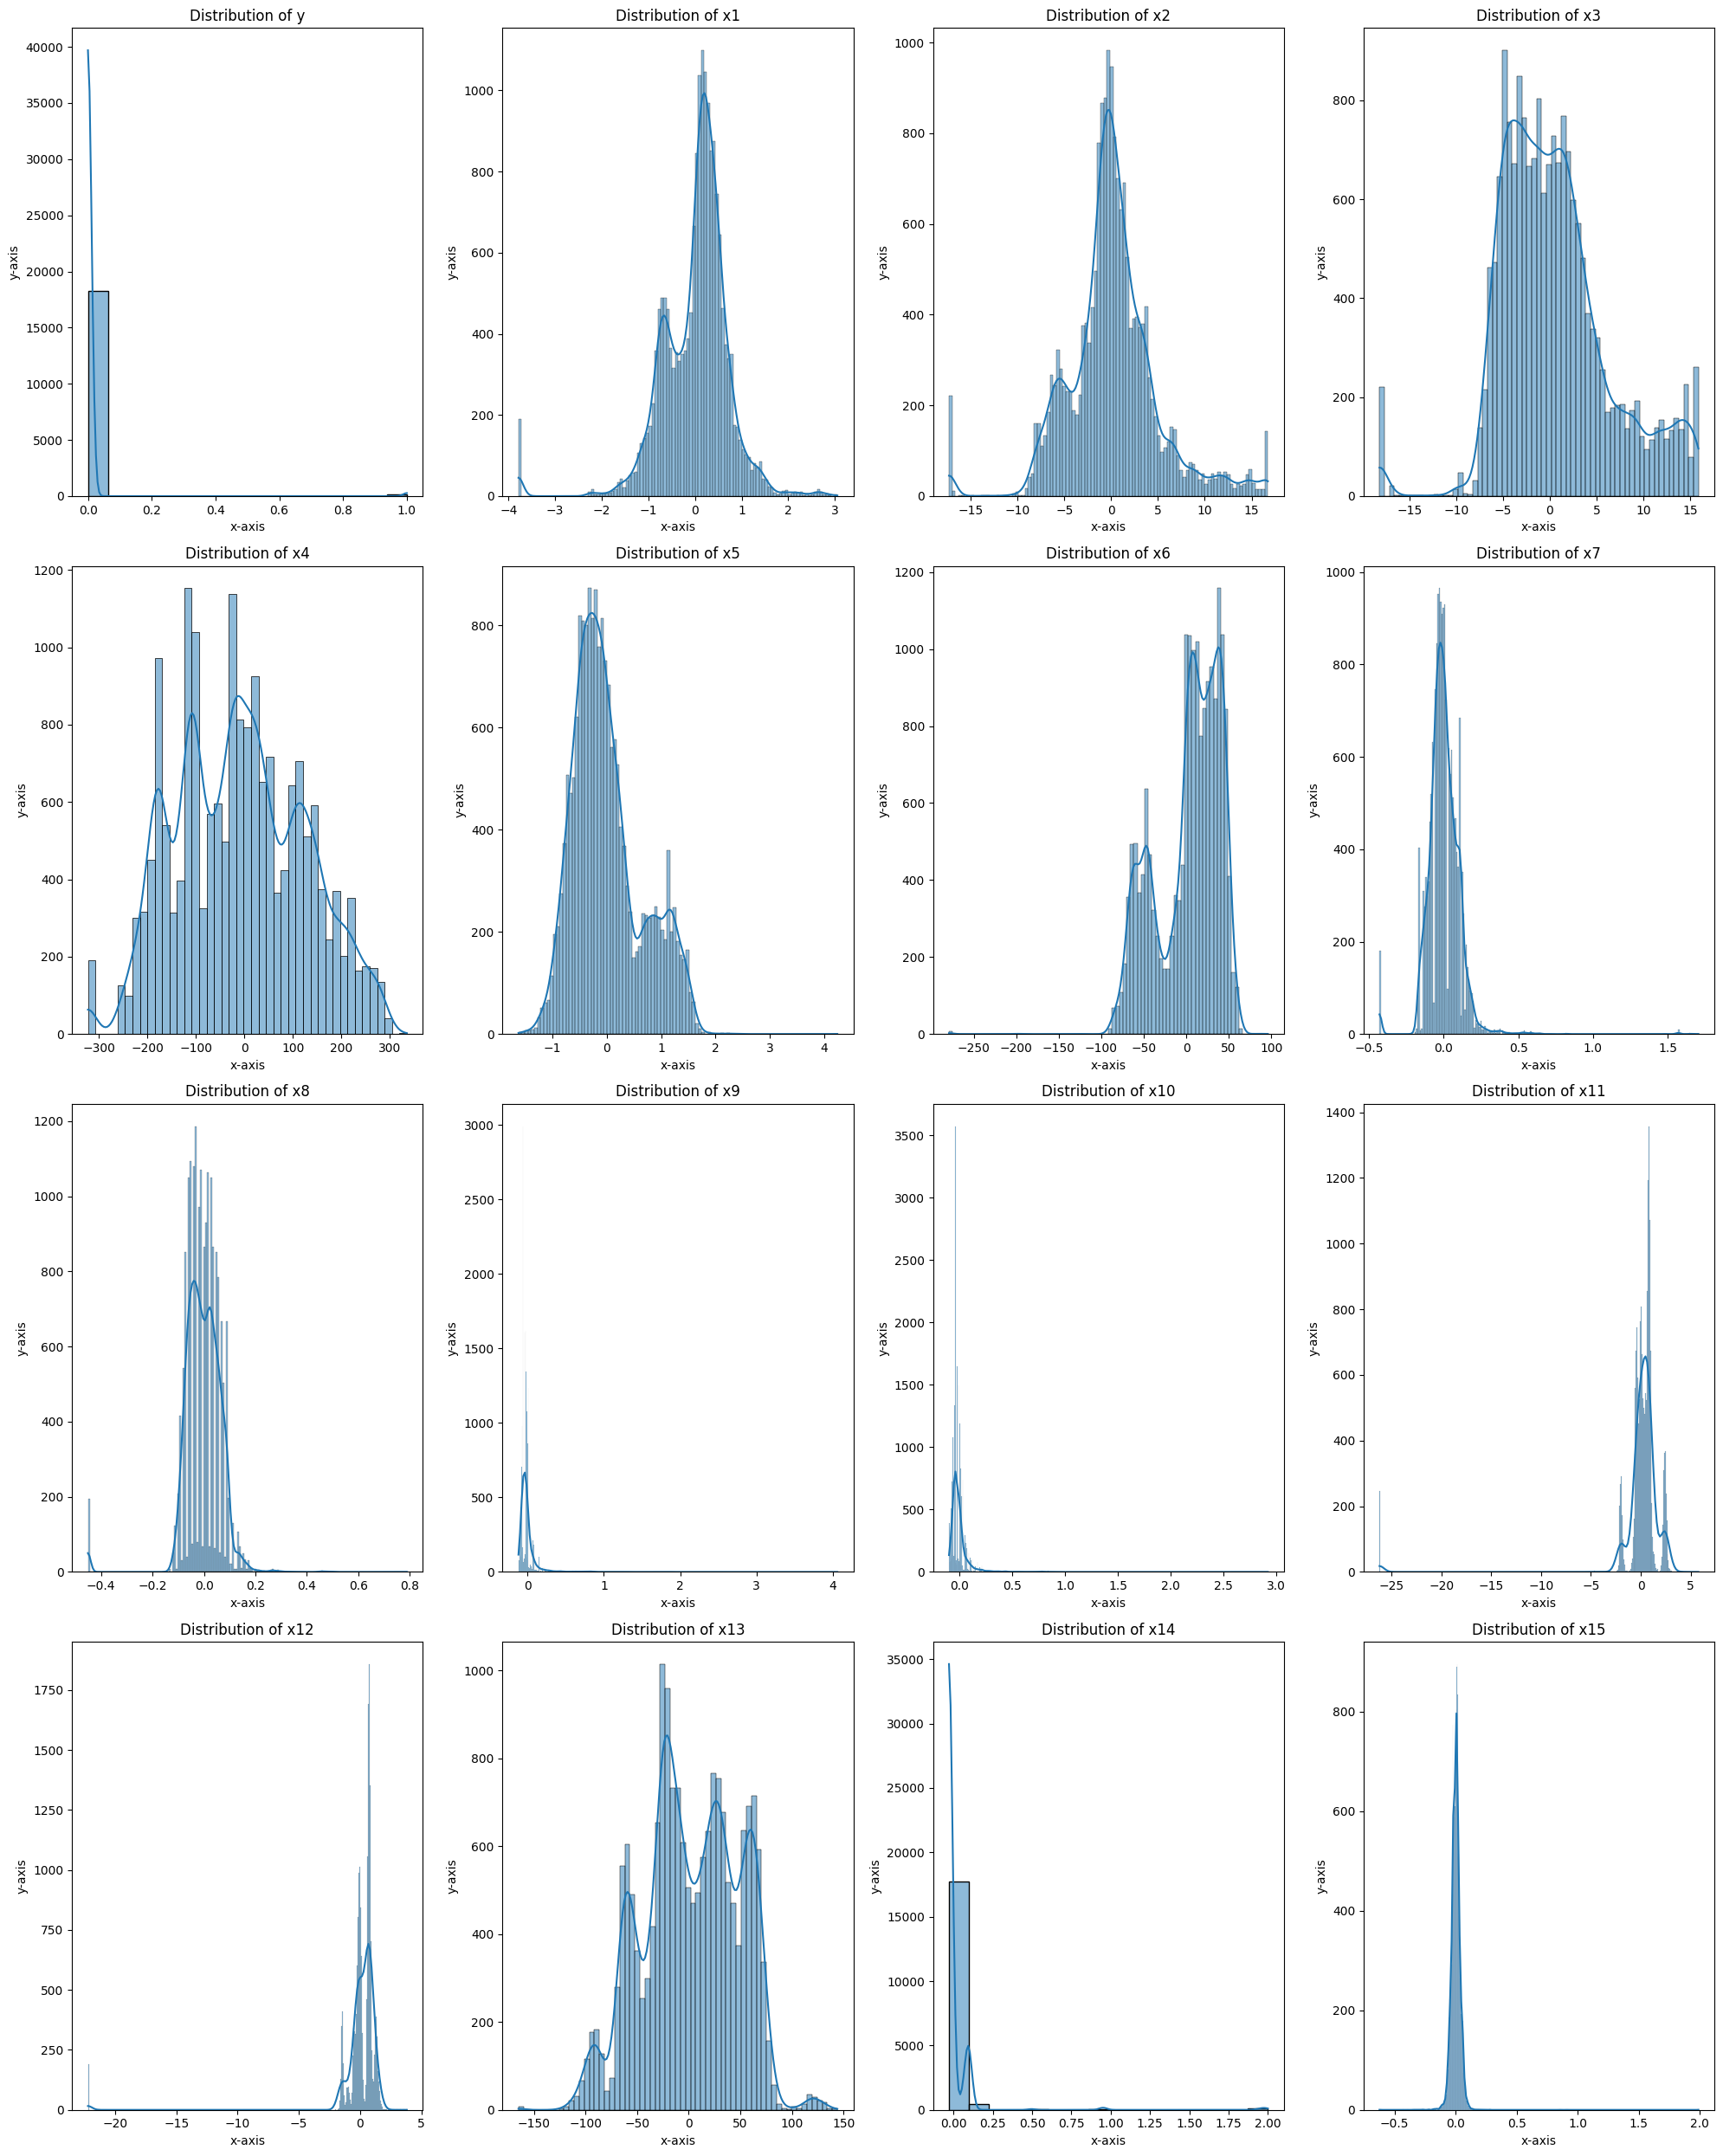

In [24]:
# Analyze and understand the data to identify patterns, relationships, and trends in the data by  Visualizations :

# Select numerical features
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

# Histograms and density plots for numerical features
plt.figure(figsize=(20,25))
num_plots = min(len(numerical_features), 16)  
num_cols = 4
num_rows = (num_plots - 1) // num_cols + 1

for i, feature in enumerate(numerical_features[:num_plots]):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel('x-axis')
    plt.ylabel('y-axis')
    plt.savefig(os.path.join(image_folder, "Analyse the data to identify patterns,relationships and trends.png"))
    
plt.tight_layout()
plt.show()


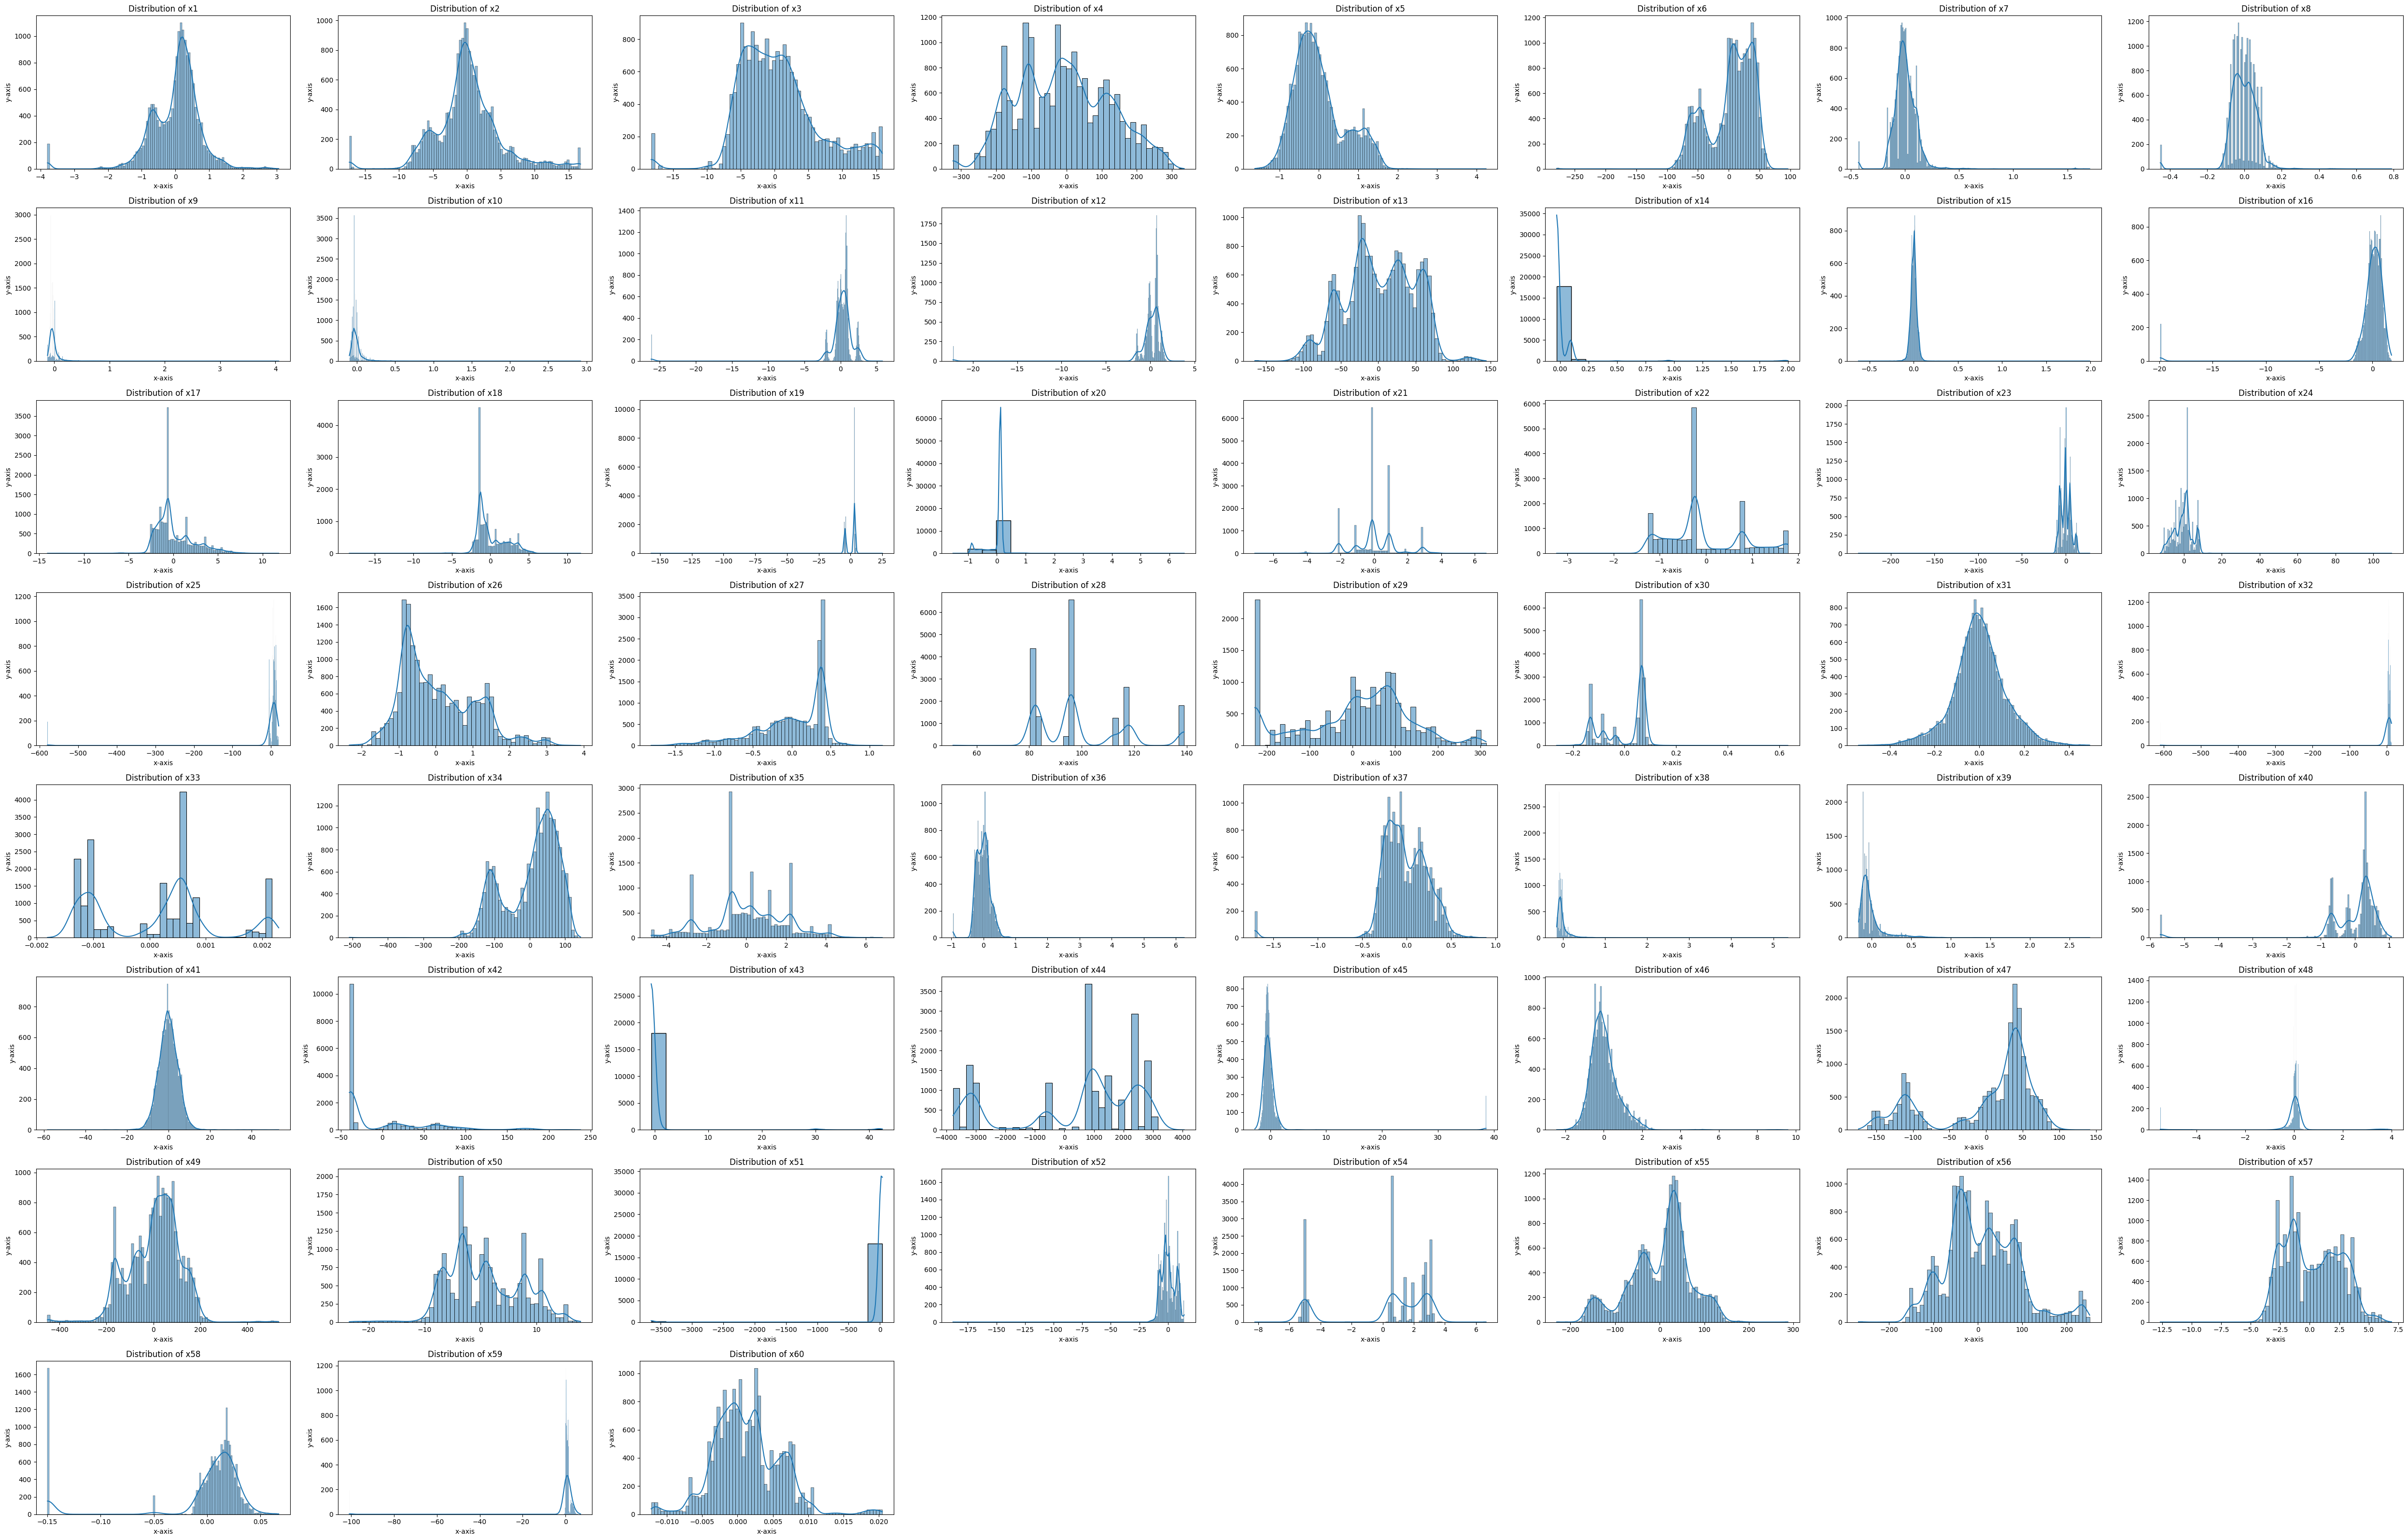

In [25]:
# Select numerical features
numerical_features = df.drop(columns=['y']).select_dtypes(include=['float64', 'int64'])

# Calculate the number of rows and columns for subplots
num_rows = (len(numerical_features.columns) - 1) // 8 + 1
num_cols = min(len(numerical_features.columns), 8)

# Create subplots for each numerical feature
plt.figure(figsize=(50, 4 * num_rows))
for i, feature in enumerate(numerical_features.columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel('x-axis')
    plt.ylabel('y-axis')
    plt.savefig(os.path.join(image_folder, "Distribution_of_numerical_features.png"))

plt.tight_layout()
plt.show()

### Heatmap for correlation matrix

In [27]:
# Calculate the Correlation matrix
corr = df.corr()  
# correlation with target data 'y'
corr_y = corr['y']
# sort correlation by absolute value in descending order 
sorted_corr_y = corr_y.abs().sort_values(ascending=False)

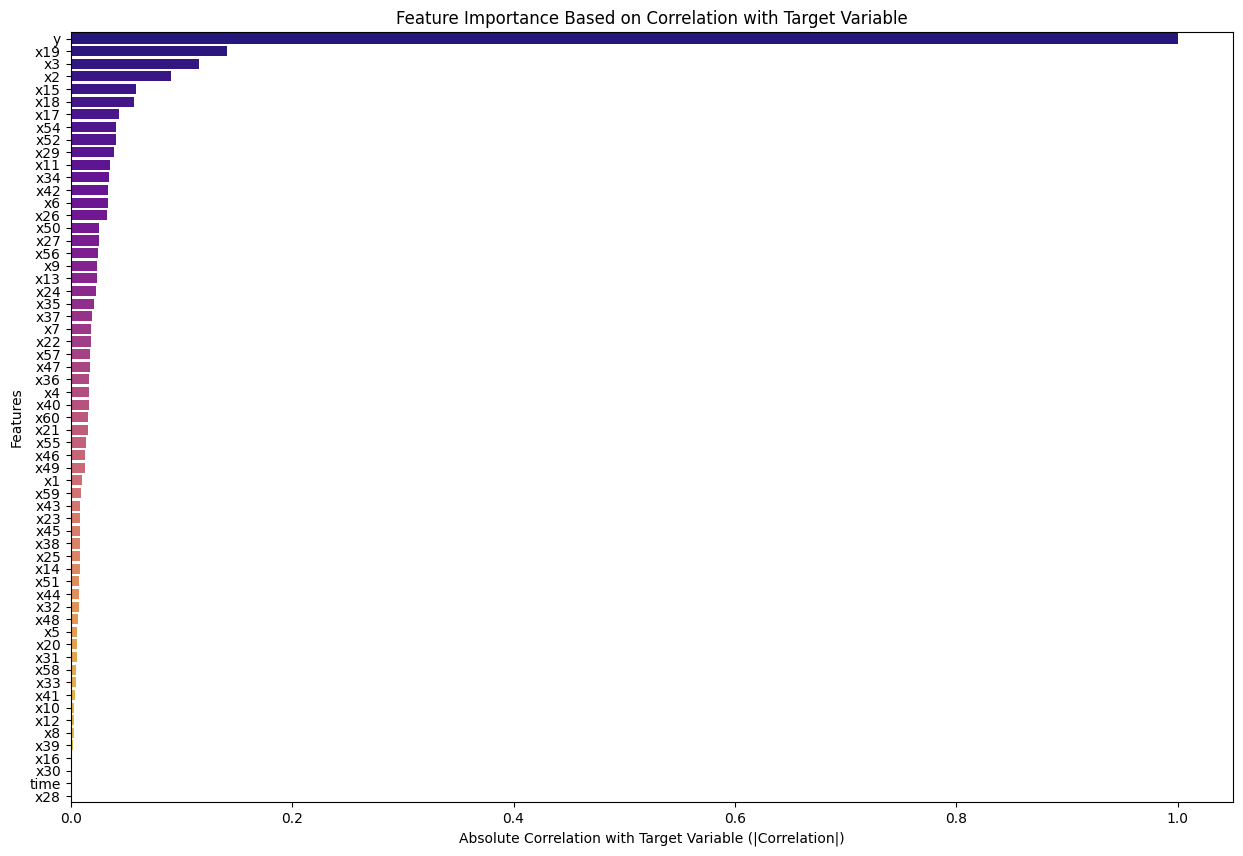

In [28]:
# Plotting
plt.figure(figsize=(15, 10))
sns.barplot(x=sorted_corr_y.values, y=sorted_corr_y.index, palette='plasma')
plt.xlabel('Absolute Correlation with Target Variable (|Correlation|)')
plt.ylabel('Features')
plt.title('Feature Importance Based on Correlation with Target Variable')
plt.savefig(os.path.join(image_folder, "Feature Importance Based on Correlation with Target Variable.png"))
plt.show()


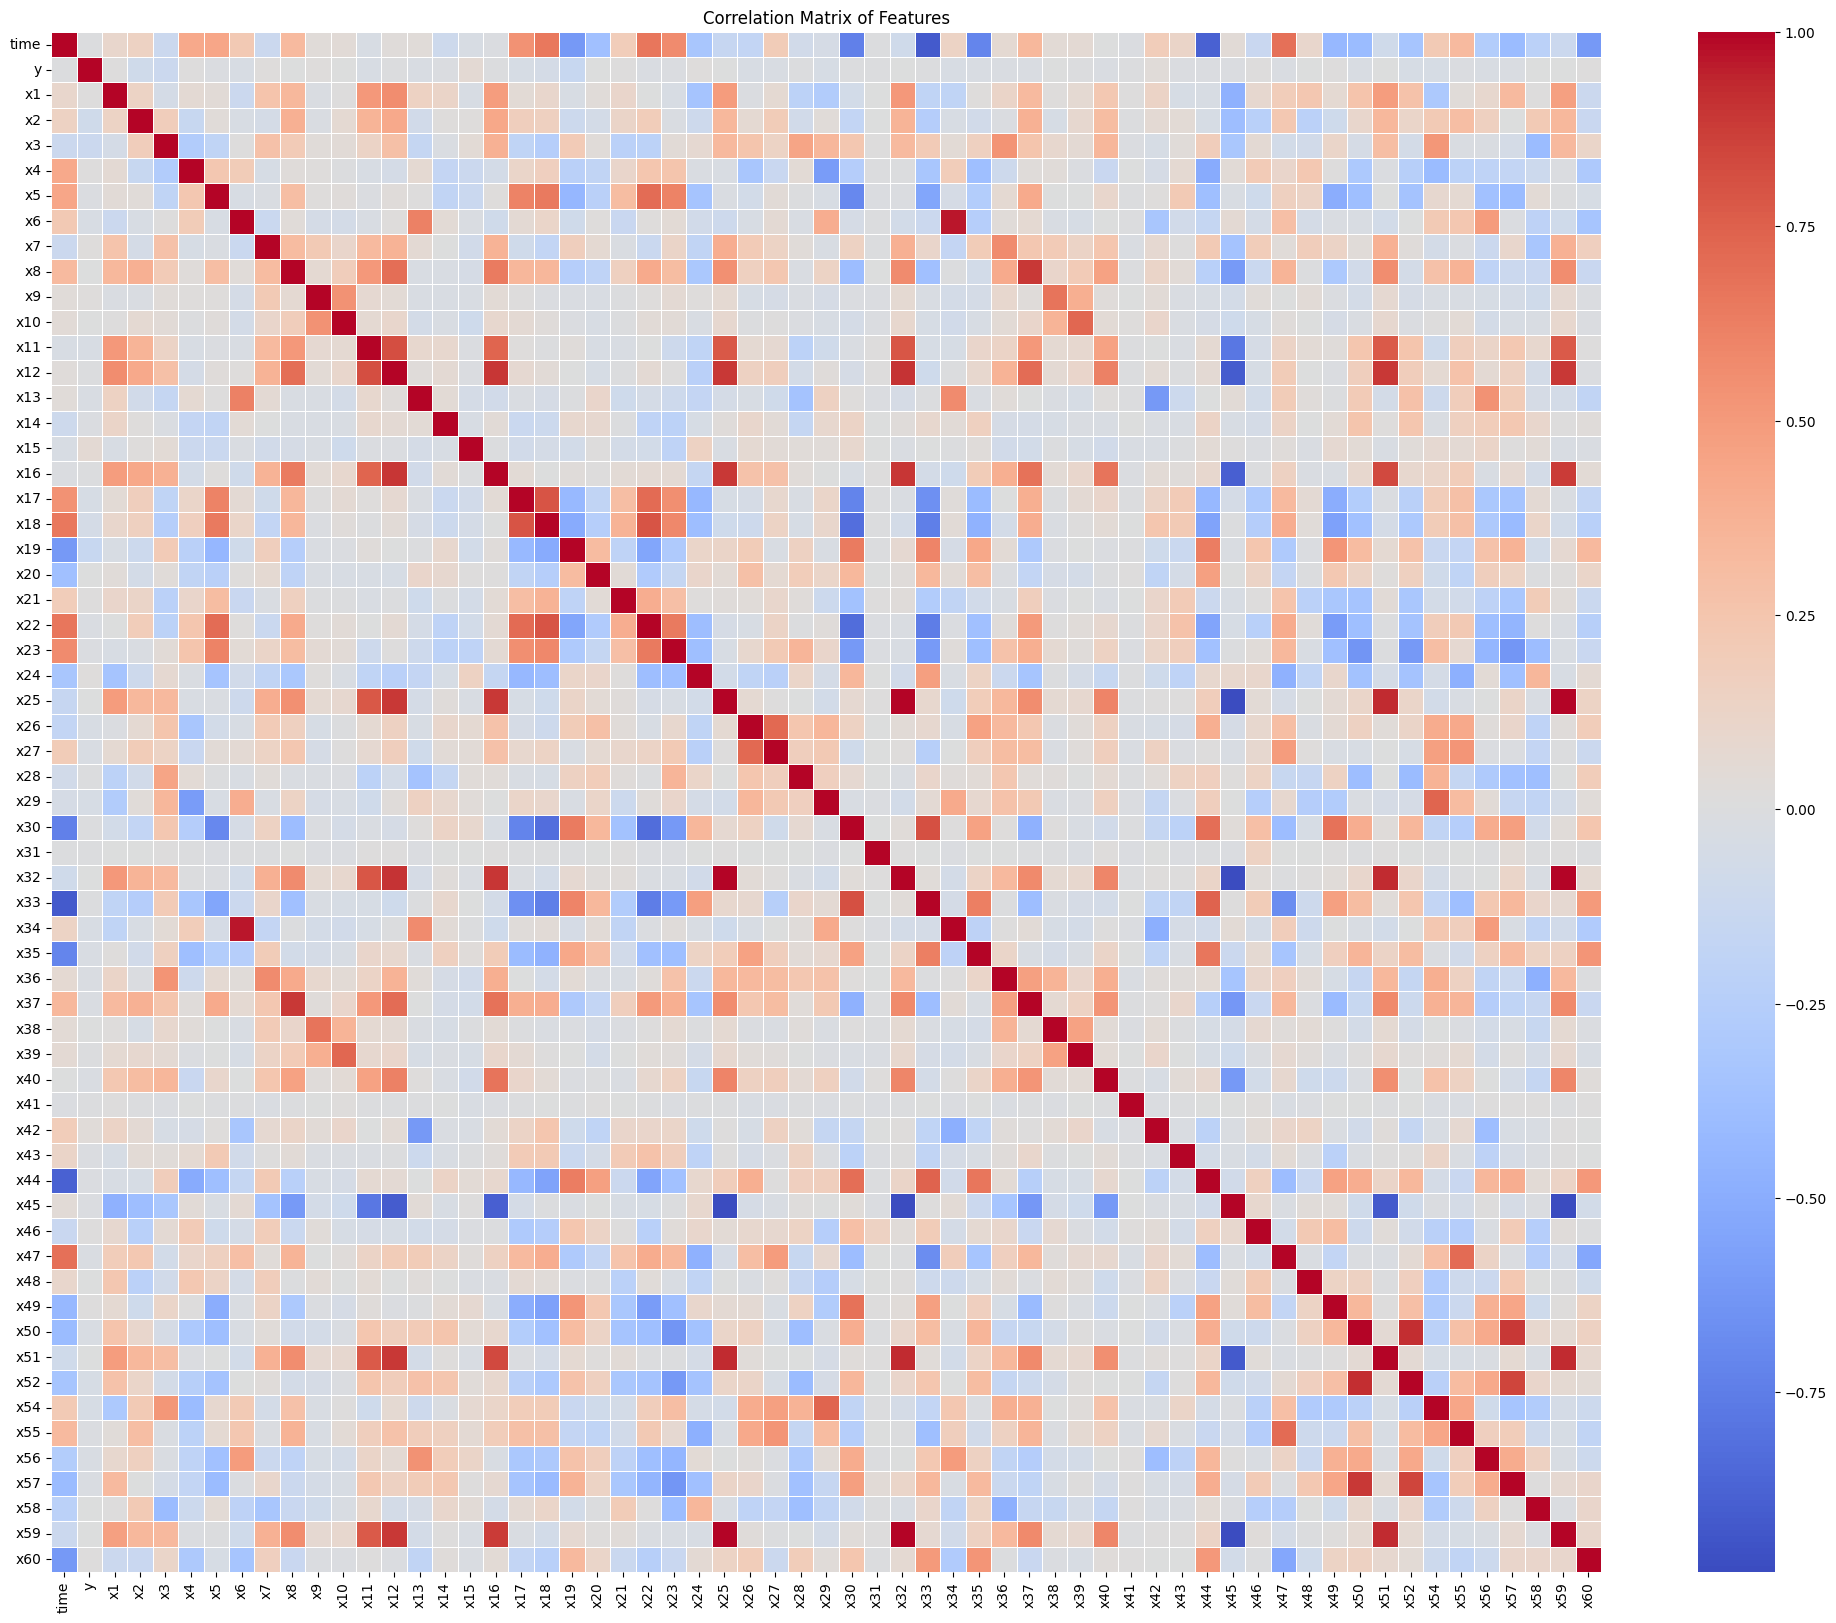

In [29]:
plt.figure(figsize=(25,20))
sns.heatmap(corr, annot=False, fmt='.2f', linewidths=0.5, cmap = 'coolwarm') 
plt.title('Correlation Matrix of Features')
plt.savefig(os.path.join(image_folder, "Correlation Matrix of Features.png"))
plt.show()

In [30]:
# Features which are strogly correlated with the target variable 'y' in ascending oreder.

print('Strogly correlated features with target y ')
target_corr = pd.DataFrame(df.corr()['y'])
target_corr.columns = ['Correlation'] 
target_corr_sort = target_corr.sort_values(by=['Correlation'], ascending=False)
target_corr_sort

Strogly correlated features with target y 


Correlation
y       1.000000
x15     0.058647
x42     0.034149
x9      0.024217
x24     0.023117
..           ...
x17    -0.043873
x18    -0.056908
x2     -0.090961
x3     -0.116369
x19    -0.140868

[61 rows x 1 columns]

In [31]:
# Top-4 features which are highly correlated with target data :
selected_features = ['y','x15','x42','x9']   

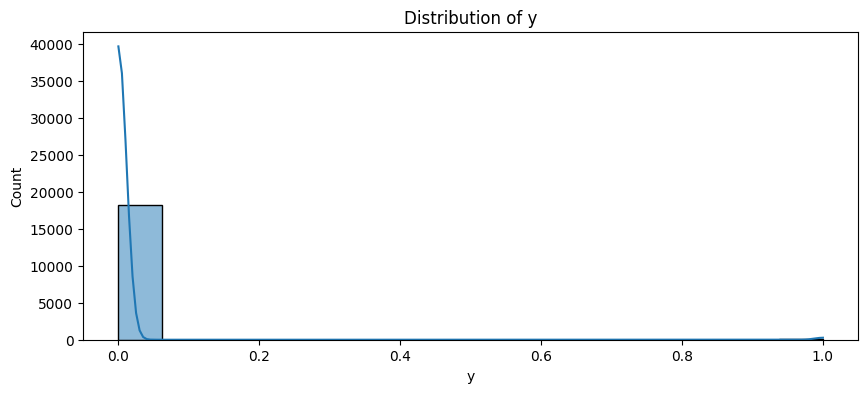

Numerical summary for y:
count    18398.000000
mean         0.006740
std          0.081822
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: y, dtype: float64




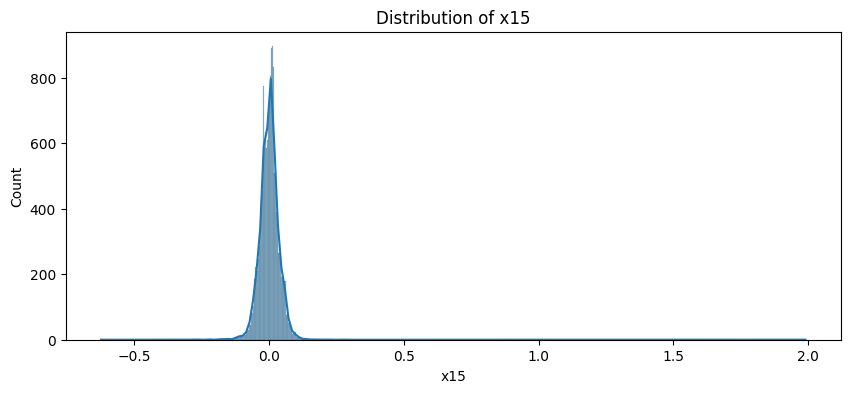

Numerical summary for x15:
count    18398.000000
mean         0.001107
std          0.039619
min         -0.623730
25%         -0.019850
50%          0.002187
75%          0.020421
max          1.990212
Name: x15, dtype: float64




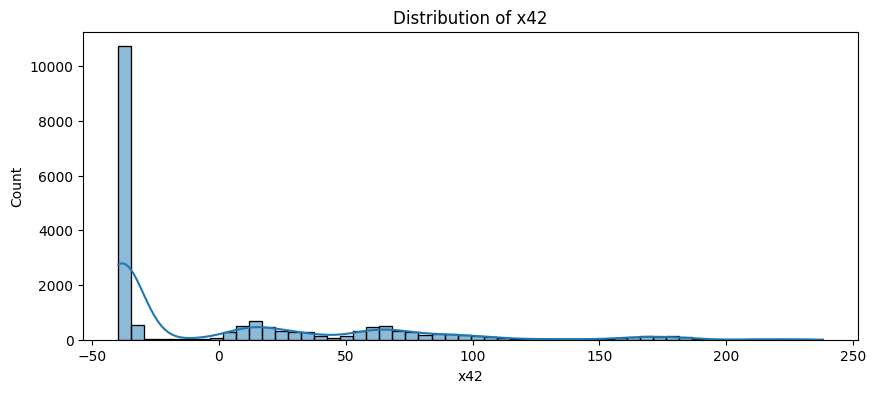

Numerical summary for x42:
count    18398.000000
mean         0.266766
std         57.751465
min        -39.592770
25%        -39.051126
50%        -36.681261
75%         29.102905
max        238.135654
Name: x42, dtype: float64




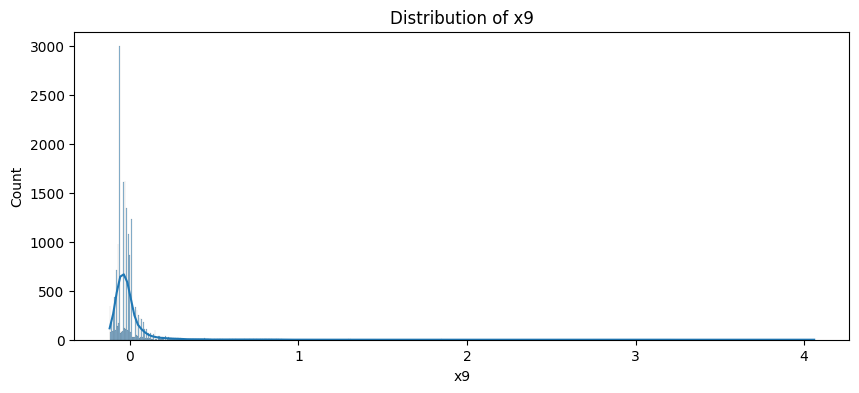

Numerical summary for x9:
count    18398.000000
mean        -0.003056
std          0.156047
min         -0.120087
25%         -0.059966
50%         -0.030057
75%          0.001990
max          4.060033
Name: x9, dtype: float64




In [32]:
# Plot histograms and show numerical summaries for selected features
for feature in selected_features:
    # Plot histogram
    plt.figure(figsize=(10, 4))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.savefig(os.path.join(image_folder, "Numerical_summaries_of_selected_features.png"))
    plt.show()
    
    # Print numerical summary
    print(f'Numerical summary for {feature}:')
    print(df[feature].describe())
    print('\n')


## Checking Outliers :

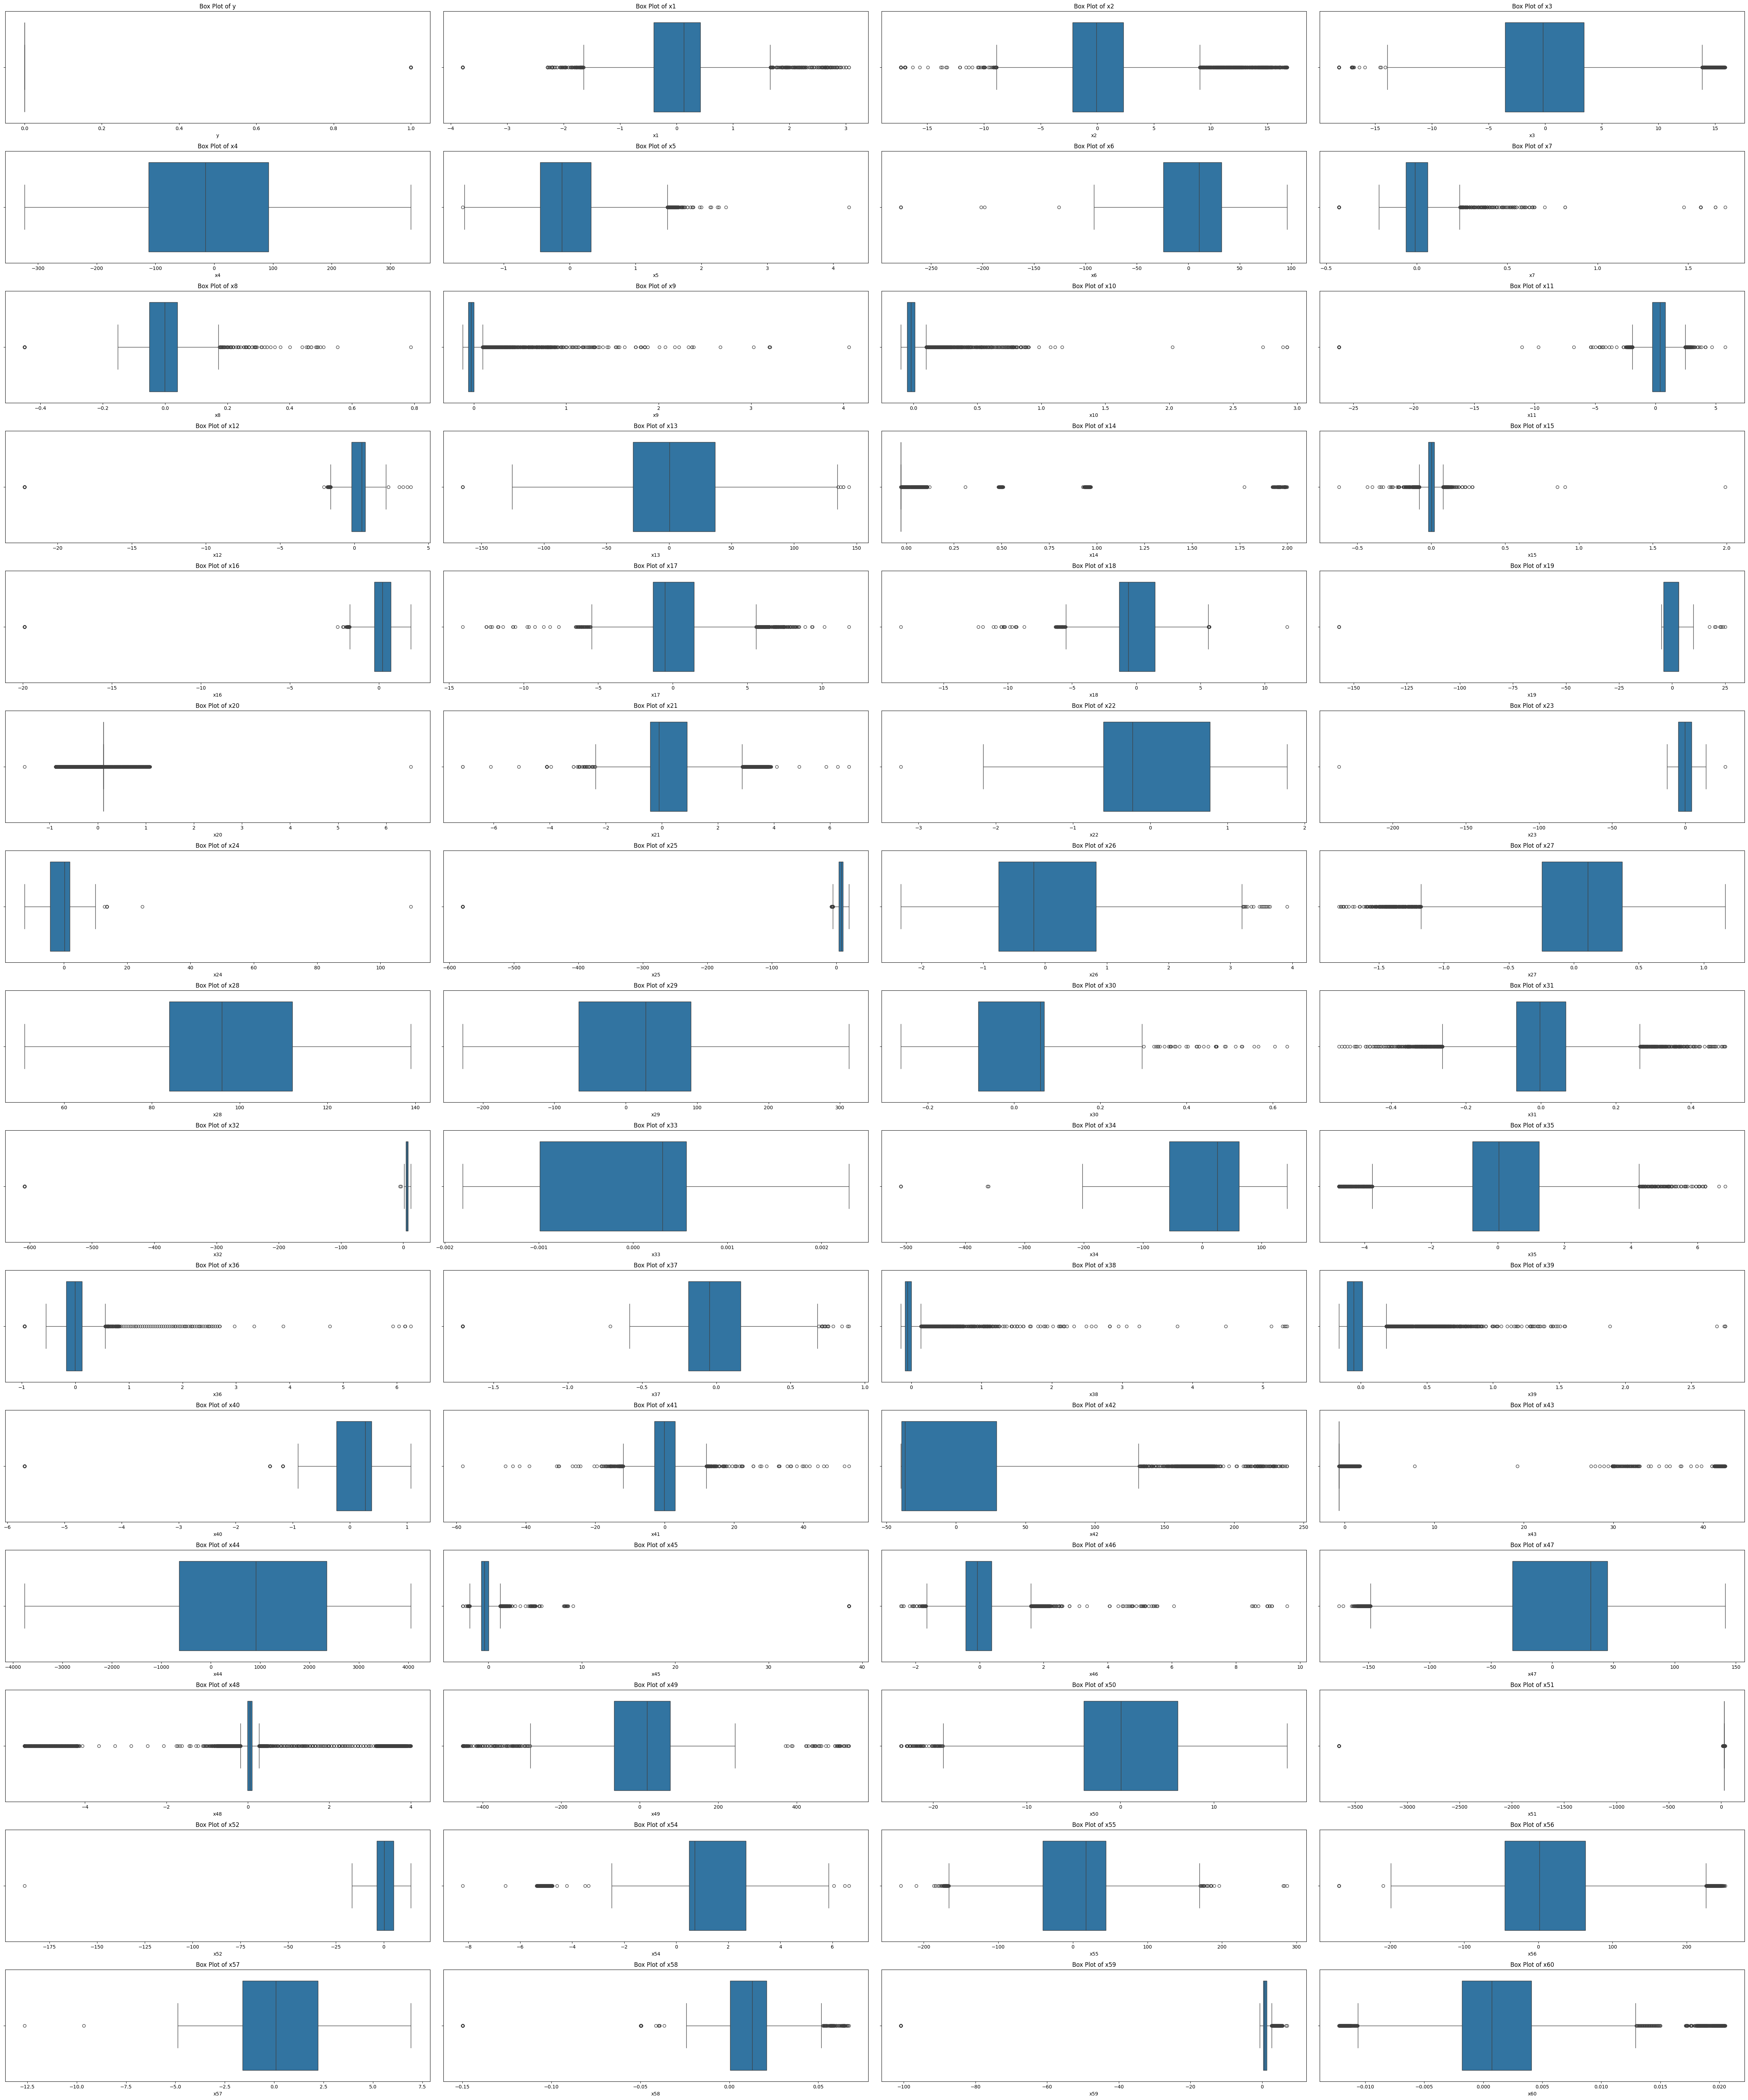

In [34]:
# Select numerical features
numerical_features = df.select_dtypes(include=['float64', 'int64'])

# Set up the figure and axes dynamically
num_features = len(numerical_features.columns)
num_rows = (num_features - 1) // 4 + 1
num_cols = min(num_features, 4)

# Visualize distributions of numerical features
plt.figure(figsize=(50, 4 * num_rows))
for i, feature in enumerate(numerical_features.columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(x=numerical_features[feature])
    plt.title(f'Box Plot of {feature}')
    plt.savefig(os.path.join(image_folder, "Identifying_Outliers.png"))

plt.tight_layout()
plt.show()


**In above we see that there are many Outliers Present in the dataset.**

### Outliers Handling :

In [37]:
numerical_cols = df.select_dtypes(include=['number']).columns.drop("y")

Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df[numerical_cols] = df[numerical_cols].clip(lower=lower_bound, upper=upper_bound, axis=1)

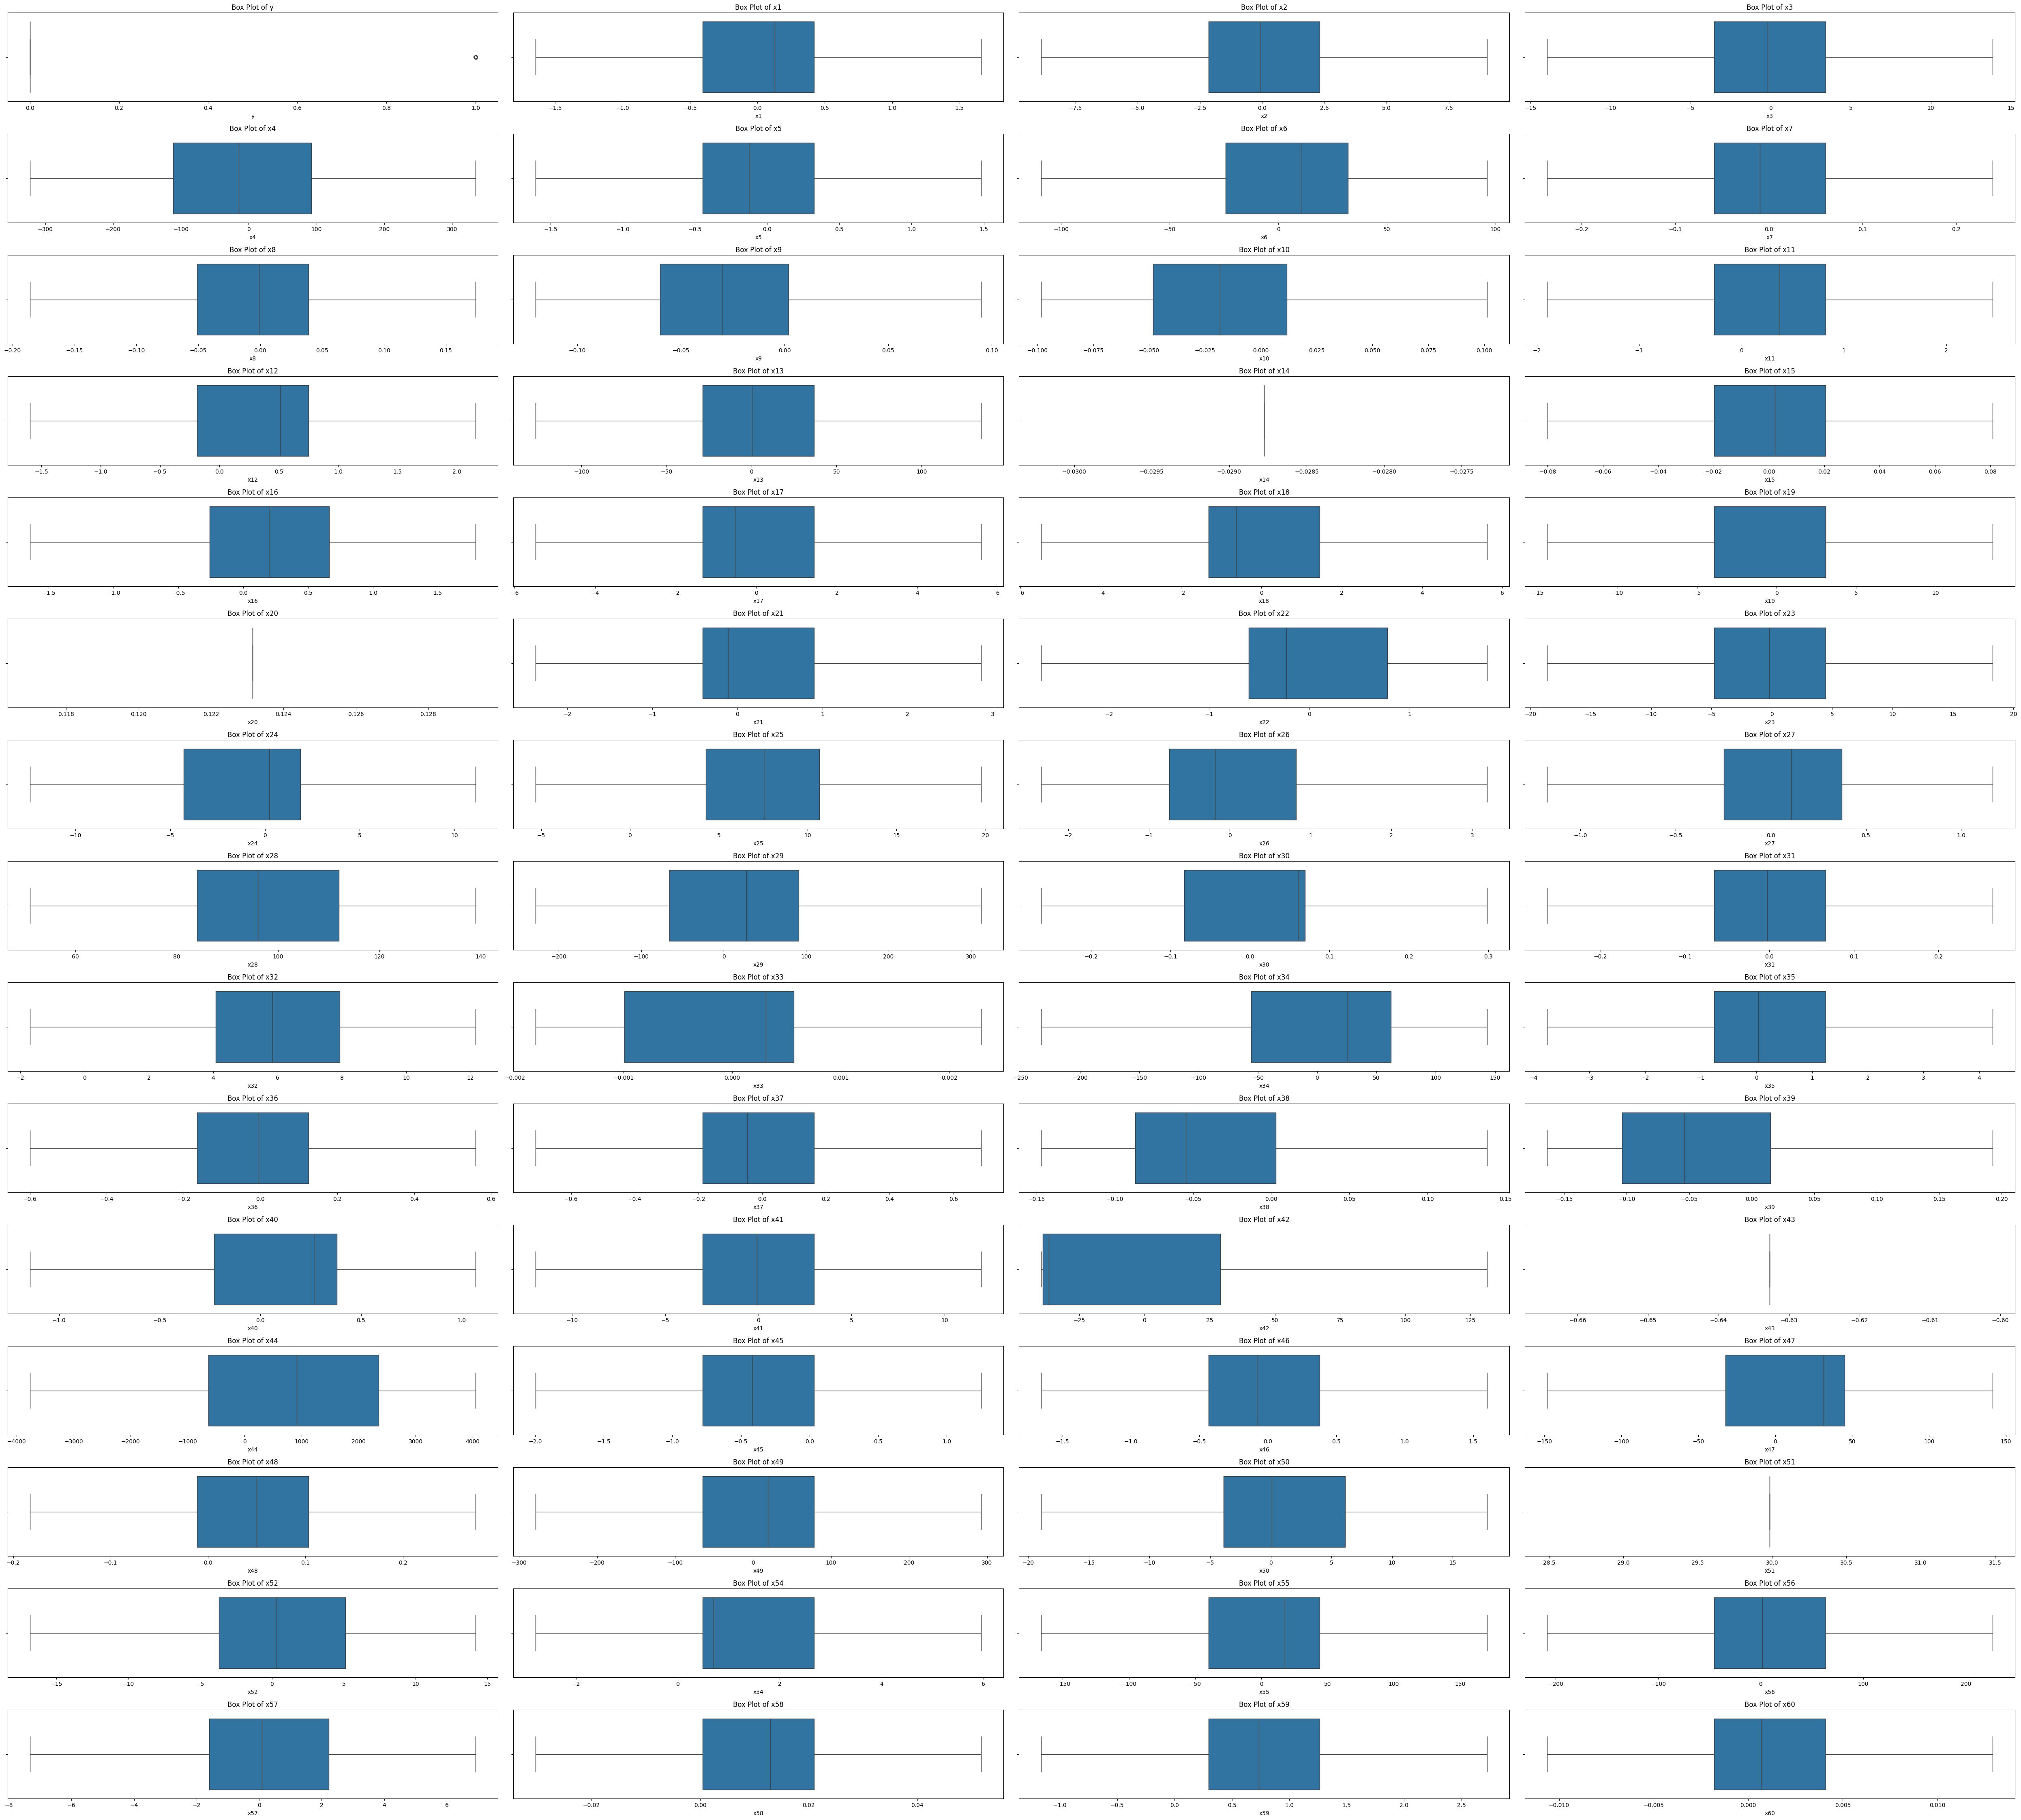

In [38]:
# non_outliers

import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical features
numerical_features = df.select_dtypes(include=['float64', 'int64'])

# Set up the figure and axes dynamically
num_features = len(numerical_features.columns)
num_rows = (num_features - 1) // 4 + 1
num_cols = min(num_features, 4)

# Visualize distributions of numerical features
plt.figure(figsize=(50, 3 * num_rows))
for i, feature in enumerate(numerical_features.columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(x=numerical_features[feature])
    plt.title(f'Box Plot of {feature}')
    plt.savefig(os.path.join(image_folder, "Handling_of_Outliers.png"))

plt.tight_layout()
plt.show()


**Now there are no outliers in the dataset.**

## Data imbalanced

In [41]:
values_count = df['y'].value_counts(normalize = True)
values_count
print('Anomaly Distribution :',values_count)

Anomaly Distribution : y
0    0.99326
1    0.00674
Name: proportion, dtype: float64


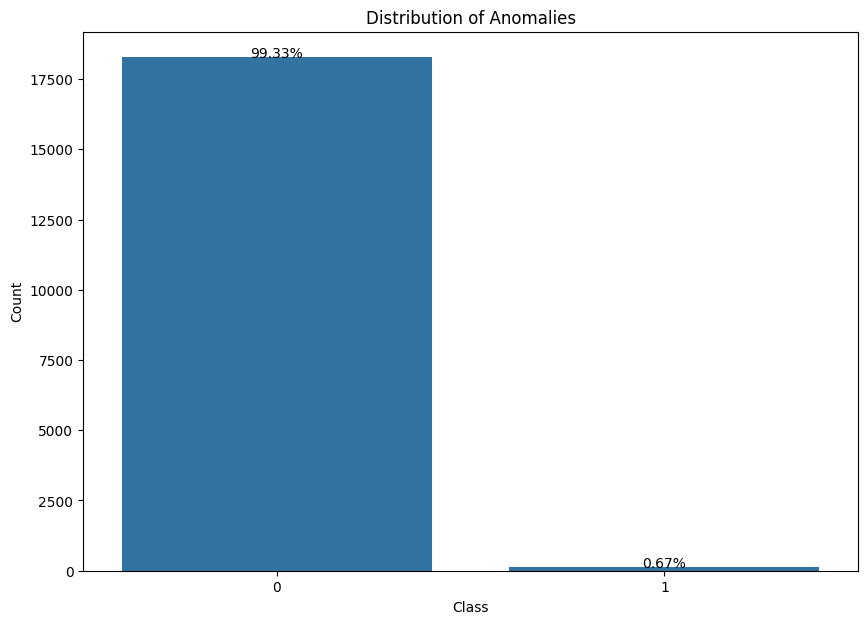

In [42]:
# plot the distribution of the target variable 'y' :
plt.figure(figsize=(10,7))
ax = sns.countplot(x ='y', data = df)
plt.title('Distribution of Anomalies')
plt.xlabel('Class')
plt.ylabel('Count')
plt.savefig(os.path.join(image_folder, "Imbalanced_Target_Variable.png"))


# Calculate percentages for each class
total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            '{:.2f}%'.format(height / total * 100),
            ha="center")

plt.show()

* In above visualization we see that the dataset has a very high imbalance (99.33% vs. 0.67%), so we have to 1st Balanced the dataset for better prediction.

### Handling Imbalanced Data 

* The dataset has a very high imbalance (99.33% vs. 0.67%), meaning:

    - Undersampling alone will result in a huge loss of majority class data (risk of losing crucial patterns).
    - Oversampling alone could cause overfitting due to synthetic data.
    - A hybrid approach (undersampling the majority class + oversampling the minority class) will create a balanced dataset while keeping enough real data for model learning.
* Combination techniques improve generalization and prevent the model from being biased toward the dominant class.

In [46]:
# Use "Resample approach" for handling Imbalanced data.

In [47]:
# Separate# anomaly and non anomaly classes :
anomaly = df[df['y'] == 0]       # majority class
non_anomaly = df[df['y'] == 1]   # minority class

# Print Shape for reference :
print(f"Normal transactions shape: {anomaly.shape}")
print(f"Fraud transactions shape: {non_anomaly.shape}")

# Step 1: Undersample the majority class to 30% of its original size
anomaly_under = anomaly.sample(frac=0.3, random_state=42)

# Step 2: Oversample the minority class to match the new majority class size
non_anomaly_over = resample(non_anomaly, replace=True, n_samples=len(anomaly_under), random_state=42)

# Combine both classes to form the balanced dataset
df_balanced = pd.concat([anomaly_under, non_anomaly_over]).sample(frac=1, random_state=42).reset_index(drop=True)

# Check new class distribution
df_balanced['y'].value_counts()


Normal transactions shape: (18274, 61)
Fraud transactions shape: (124, 61)


y
1    5482
0    5482
Name: count, dtype: int64

### Save the Balanced Data :

In [149]:
file_path = os.path.join(r"C:\Users\komal\OneDrive\Documents\UpGrade\LEARNING material\Capston-projects (Dataset)\Anomaly_Detection_Capston_Project\data", "balanced_data.xlsx")
df_balanced.to_excel(file_path, index = False)

### Balanced dataset :

In [49]:
df_balanced.head(2)

time  y        x1        x2         x3          x4        x5  \
0 1999-05-06 16:16:00  1 -0.277417  1.243791   0.292656 -179.957760  0.150976   
1 1999-05-19 06:10:00  1  0.081450 -8.822999 -13.974471  -88.954751  1.224462   

          x6        x7        x8  ...       x50        x51       x52  \
0 -82.016548 -0.129276 -0.061114  ...  1.053456  29.984624  0.420822   
1 -39.242729 -0.029176 -0.000993  ... -5.489269  29.984624 -4.884110   

        x54        x55        x56       x57       x58       x59       x60  
0  2.649472 -16.066464 -22.756018  0.952526  0.022722  1.156344  0.005900  
1  3.118921  99.758853 -70.420416 -0.475697  0.009419  1.180834  0.012925  

[2 rows x 61 columns]

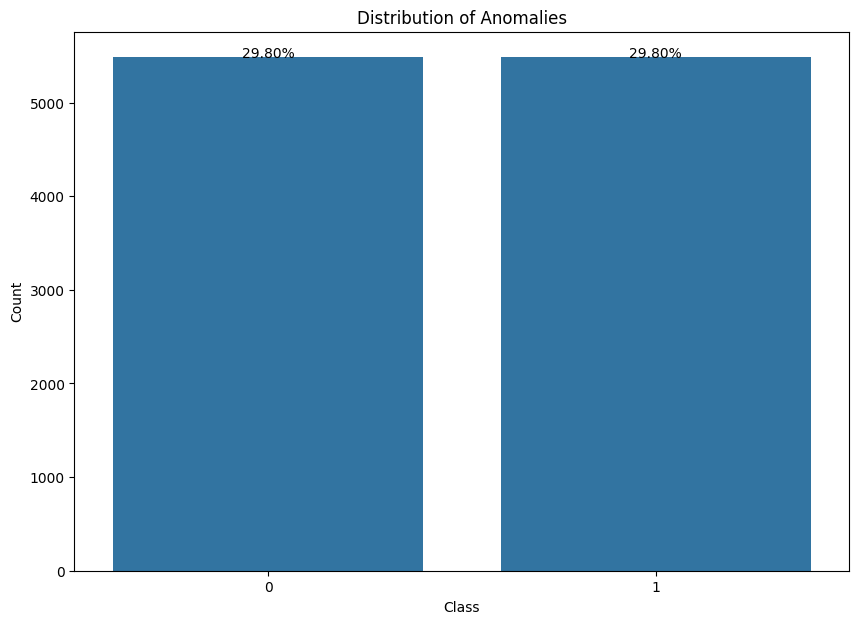

In [50]:
# plot the distribution of the target variable 'y' :
plt.figure(figsize=(10,7))
ax = sns.countplot(x ='y', data = df_balanced)
plt.title('Distribution of Anomalies')
plt.xlabel('Class')
plt.ylabel('Count')
plt.savefig(os.path.join(image_folder, "Balanced_Target_Variable.png"))


# Calculate percentages for each class
total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            '{:.2f}%'.format(height / total * 100),
            ha="center")

plt.show()

# Build the model 

In [52]:
# top-3 columns of balanced dataset :
df_balanced.head(3)

time  y        x1        x2         x3          x4        x5  \
0 1999-05-06 16:16:00  1 -0.277417  1.243791   0.292656 -179.957760  0.150976   
1 1999-05-19 06:10:00  1  0.081450 -8.822999 -13.974471  -88.954751  1.224462   
2 1999-05-13 18:14:00  1  0.720304 -2.239999  -6.178082   86.779822  0.164220   

          x6        x7        x8  ...       x50        x51       x52  \
0 -82.016548 -0.129276 -0.061114  ...  1.053456  29.984624  0.420822   
1 -39.242729 -0.029176 -0.000993  ... -5.489269  29.984624 -4.884110   
2 -47.646400 -0.089298 -0.071186  ...  0.981190  29.984624  0.294846   

        x54        x55        x56       x57       x58       x59       x60  
0  2.649472 -16.066464 -22.756018  0.952526  0.022722  1.156344  0.005900  
1  3.118921  99.758853 -70.420416 -0.475697  0.009419  1.180834  0.012925  
2 -2.794177 -48.856625 -20.893347  1.642284  0.017238  0.038927 -0.001665  

[3 rows x 61 columns]

In [53]:
# Drop "time" column for model building :
df1 = df_balanced.drop(['time'],axis=1)
df1

y        x1        x2         x3          x4        x5         x6  \
0      1 -0.277417  1.243791   0.292656 -179.957760  0.150976 -82.016548   
1      1  0.081450 -8.822999 -13.974471  -88.954751  1.224462 -39.242729   
2      1  0.720304 -2.239999  -6.178082   86.779822  0.164220 -47.646400   
3      1  1.661578 -0.741048  -9.638067   40.086036 -0.770960 -81.630180   
4      1 -0.411052 -8.826300  -9.723619  -99.466882  0.235036 -60.351768   
...   ..       ...       ...        ...         ...       ...        ...   
10959  1 -0.660440 -7.683207  -2.034607 -141.214790  0.177175   8.373299   
10960  0 -0.050736 -6.132316  11.920557 -120.130970  0.052373 -46.584678   
10961  0 -0.496366 -5.716915   1.675696 -137.880790 -0.275980  12.677864   
10962  0 -0.707962 -0.098008  -0.184654 -322.781610 -0.121729  16.089211   
10963  1 -0.585888  4.334281  -2.510295  -20.444025 -0.276637  33.557656   

             x7        x8        x9  ...       x50        x51       x52  \
0     -0.129276 -0.061114  0.094923  ...  1.053456  29.984624  0.420822   
1     -0.029176 -0.000993 -0.070037  ... -5.489269  29.984624 -4.884110   
2     -0.089298 -0.071186 -0.120087  ...  0.981190  29.984624  0.294846   
3      0.100832  0.008773  0.061579  ... -4.802745  29.984624 -4.658035   
4      0.239068  0.168995 -0.000149  ... -1.833995  29.984624 -3.463944   
...         ...       ...       ...  ...       ...        ...       ...   
10959 -0.039246 -0.061114 -0.000149  ... -8.001476  29.984624 -8.690262   
10960  0.110598 -0.081257 -0.099945  ... -8.021739  29.984624 -8.708328   
10961  0.070619 -0.011064 -0.059966  ... -7.770275  29.984624 -7.792801   
10962  0.015665  0.018844 -0.019986  ... -1.917980  29.984624 -2.757156   
10963 -0.069155 -0.021135 -0.019986  ... -3.494151  29.984624 -2.175613   

            x54         x55         x56       x57       x58       x59  \
0      2.649472  -16.066464  -22.756018  0.952526  0.022722  1.156344   
1      3.118921   99.758853  -70.420416 -0.475697  0.009419  1.180834   
2     -2.794177  -48.856625  -20.893347  1.642284  0.017238  0.038927   
3     -2.794177  -86.763974 -112.199560 -2.111499  0.028799  0.834040   
4     -2.794177   -5.086484  -52.971655  0.696178 -0.003202  2.723731   
...         ...         ...         ...       ...       ...       ...   
10959  1.896143 -158.868340  -97.941138 -3.301747  0.022002  2.458643   
10960  1.930862 -153.500670  -26.575797 -2.721852 -0.030312  1.292223   
10961  1.942527 -158.006160  -22.308981 -2.782887  0.020504  2.439425   
10962  2.704491  -44.474057  -41.149863 -1.043324  0.021413  2.723731   
10963  0.579627   48.744693  -37.370154 -1.165393 -0.011709  1.099962   

            x60  
0      0.005900  
1      0.012925  
2     -0.001665  
3      0.000866  
4      0.006212  
...         ...  
10959  0.006810  
10960 -0.000410  
10961  0.008947  
10962  0.006304  
10963 -0.003765  

[10964 rows x 60 columns]

In [54]:
# Identify Feature(X) data and Target(y) data :
X = df1.drop('y',axis=1)
y = df1['y']

## Train-Test Split :

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7, random_state = 42)

In [57]:
print('X_train shape =', X_train.shape)
print('X_test shape =', X_test.shape)
print('y_train shape =', y_train.shape)
print('y_test shape =', y_test.shape)

X_train shape = (7674, 59)
X_test shape = (3290, 59)
y_train shape = (7674,)
y_test shape = (3290,)


# Feature Scaling :

In [59]:
scale = StandardScaler()
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.transform(X_test)

#### create an empty dataframe to store the scores for various algorithms :

In [61]:
#from sklearn.metrics import roc_auc_score, precision_score, recall_score, roc_auc_score, f1_score
score_card = pd.DataFrame(columns=['model_name','Accuracy Score','Precision Score','Recall Score','AUC Score','f1 Score'])

# append the result table for all performance scores

def update_score_card(y_test,y_pred,model_name):

    # assign 'score_card' as global variable
    global score_card

    # Debugging: Print model name and unique values in y_pred to ensure different predictions
    print(f"Updating score for model: {model_name}")
    print(f"Unique predictions: {set(y_pred)}")  # Check if predictions are changing

    
    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    new_row = pd.DataFrame([{'model_name':model_name,
                                    'Accuracy Score' : accuracy_score(y_test, y_pred),
                                    'Precision Score': precision_score(y_test, y_pred),
                                    'Recall Score': recall_score(y_test, y_pred),
                                    'AUC Score': roc_auc_score(y_test, y_pred),
                                    'f1 Score': f1_score(y_test, y_pred)}])

    # Concatenate instead of append
    score_card = pd.concat([score_card, new_row], ignore_index=True).drop_duplicates()
                                    

# 1) Naive Bayes :

In [63]:
#from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb_model = nb.fit(X_train_scaled,y_train)  # Train the model

y_pred_test1 = nb_model.predict(X_test_scaled)    # Run model on test dataset
y_pred_train1 = nb_model.predict(X_train_scaled)  # Run model on Train dataset

# Evaluate the model
print('Naive Bayes Performance on Training data before tunning :', accuracy_score(y_train,y_pred_train1))
print('Naive Bayes Performance on Test data before tunning :', accuracy_score(y_test,y_pred_test1))

Naive Bayes Performance on Training data before tunning : 0.7413343758144384
Naive Bayes Performance on Test data before tunning : 0.7422492401215806


#### Applying Grid Search Cross Validation to find the best value of Hyper Parameters

In [65]:
params1 = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4]  # Values in a logarithmic scale
}

# Perform Grid Search
grid1 = GridSearchCV(nb, param_grid=params1, scoring='accuracy', cv=5, n_jobs=-1).fit(X_train_scaled, y_train)

print("Best Parameters:", grid1.best_params_)
print("Best Accuracy:", grid1.best_score_)
print("Best estimator:", grid1.best_estimator_)
kcls1 = grid1.best_estimator_

Best Parameters: {'var_smoothing': 1e-09}
Best Accuracy: 0.7439417502940939
Best estimator: GaussianNB()


### Creating Naive_Bayes Tunned Model :

In [67]:
nb_tunned_model = kcls1.fit(X_train_scaled,y_train)
y_pred_test1_tunned = nb_tunned_model.predict(X_test_scaled)

print('Naive Bayes Performance on Test data after Tunning :',accuracy_score(y_test, y_pred_test1_tunned))

Naive Bayes Performance on Test data after Tunning : 0.7422492401215806


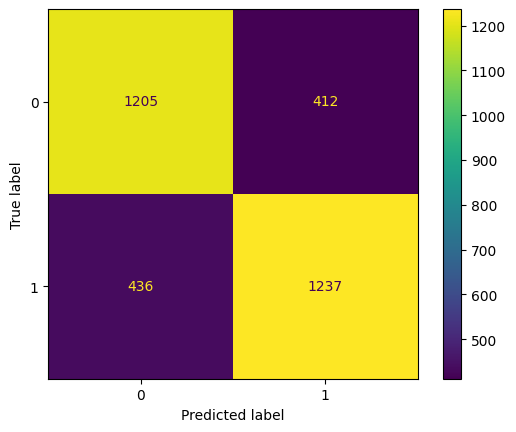

In [68]:
# Confusion_matrix :
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_test1_tunned)).plot()

# save figure
plt.savefig(os.path.join(image_folder, "Naive_Bayes_confusion_matrix.png"))
plt.show()

Roc Auc Score : 0.7422987452873885


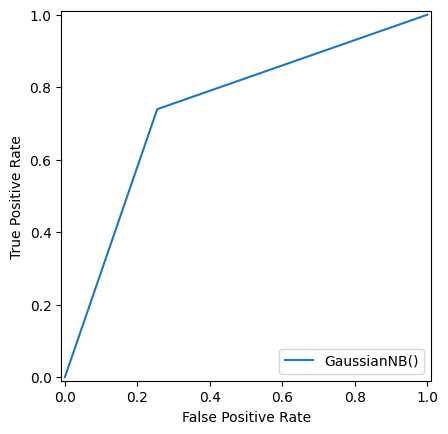

In [69]:
# Roc_Auc_score :
print('Roc Auc Score :',roc_auc_score(y_test, y_pred_test1_tunned))
# Display the ROC Curve :
fpr,tpr,threshold=roc_curve(y_test,y_pred_test1_tunned)
RocCurveDisplay(fpr=fpr,tpr=tpr,estimator_name=nb).plot()

# save figure
plt.savefig(os.path.join(image_folder, "Naive_Bayes_Roc_Curve.png"))
plt.show()

In [70]:
#Using F1 Score we are checking the accuracy on the testing dataset
target_names= ["Non_Anomaly(0)","Anomaly(1)"]
# Classification_report of DecisionTree_model :
print(classification_report(y_test,y_pred_test1_tunned,target_names=target_names))

                precision    recall  f1-score   support

Non_Anomaly(0)       0.73      0.75      0.74      1617
    Anomaly(1)       0.75      0.74      0.74      1673

      accuracy                           0.74      3290
     macro avg       0.74      0.74      0.74      3290
  weighted avg       0.74      0.74      0.74      3290



### 	The accuracy of the model on the test data set :

In [72]:
# update the score card :
update_score_card(y_test,y_pred_test1,'Naive_Bayes_initial_model')
update_score_card(y_test,y_pred_test1_tunned,'Naive_Bayes_tuned_model')

Updating score for model: Naive_Bayes_initial_model
Unique predictions: {0, 1}
Updating score for model: Naive_Bayes_tuned_model
Unique predictions: {0, 1}


In [73]:
# calling the score card :
score_card

model_name  Accuracy Score  Precision Score  Recall Score  \
0  Naive_Bayes_initial_model        0.742249         0.750152       0.73939   
1    Naive_Bayes_tuned_model        0.742249         0.750152       0.73939   

   AUC Score  f1 Score  
0   0.742299  0.744732  
1   0.742299  0.744732

# 2) KNN Model :

In [75]:
#from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn_model = knn.fit(X_train_scaled, y_train)  # Train the model 

y_pred_train2 = knn_model.predict(X_train_scaled)   # Run model on train dataset
y_pred_test2 = knn_model.predict(X_test_scaled)     # Run model on test dataset

# check accuracy score:
print('KNN Performance on Training data before tunning :', accuracy_score(y_train,y_pred_train2))
print('KNN Performance on Test data before tunning :', accuracy_score(y_test,y_pred_test2))

KNN Performance on Training data before tunning : 0.9921813917122753
KNN Performance on Test data before tunning : 0.9838905775075988


#### Applying Grid Search Cross Validation to find the best value of Hyper Parameters

In [77]:
# K-th value for KNN_model :
k = round(np.sqrt(len(X_train_scaled)))
print('kth value =',k)
print(' ')

# n no.of neighbors values :
n_neighbor = np.arange(1,k+2,2)   
print('n_neighbor values =',n_neighbor)

kth value = 88
 
n_neighbor values = [ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45 47
 49 51 53 55 57 59 61 63 65 67 69 71 73 75 77 79 81 83 85 87 89]


In [78]:
# Define a reduced parameter grid
params2 = {
    'n_neighbors':n_neighbor, 
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto'],  
    'metric': ['minkowski']  
}

# Perform Grid Search with a smaller CV
grid2 = GridSearchCV(knn, param_grid=params2, scoring='accuracy', cv=5, n_jobs=-1)
grid2.fit(X_train_scaled, y_train)

# Print best parameters
print("Best parameters:", grid2.best_params_)
print("Best accuracy:", grid2.best_score_)
print("Best estimator:", grid2.best_estimator_)
kcls2 = grid2.best_estimator_

Best parameters: {'algorithm': 'auto', 'metric': 'minkowski', 'n_neighbors': 1, 'weights': 'uniform'}
Best accuracy: 0.9951783886626264
Best estimator: KNeighborsClassifier(n_neighbors=1)


### Creating KNN Tuned Model :

In [80]:
knn_tuned_model = kcls2.fit(X_train_scaled, y_train)

# Run the model on the Test Dataset :
y_pred_test2_tunned = knn_tuned_model.predict(X_test_scaled)

print('KNN Performance on Test data after tunning :',accuracy_score(y_test,y_pred_test2_tunned))

KNN Performance on Test data after tunning : 0.9945288753799392


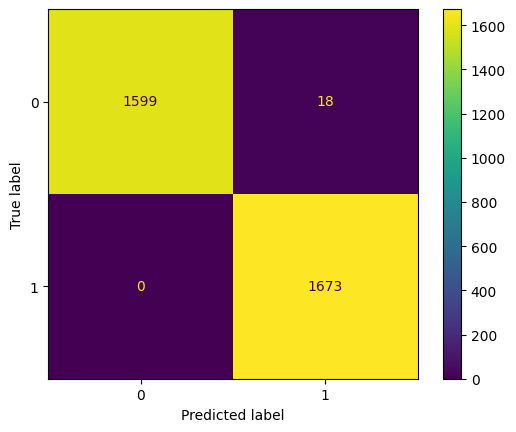

In [81]:
# Confusion matrix of KNN model :
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_test2_tunned)).plot()

# save figure
plt.savefig(os.path.join(image_folder, "KNN_confusion_matrix.png"))
plt.show()

In [82]:
# RO_curve of KNN_model :
roc_auc_score(y_test, y_pred_test2_tunned)

0.9944341372912802

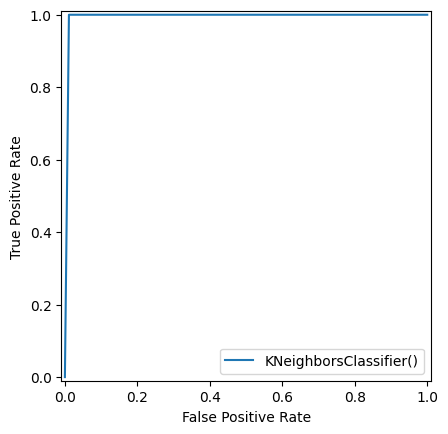

In [83]:
fpr,tpr,threshold=roc_curve(y_test,y_pred_test2_tunned)
RocCurveDisplay(fpr=fpr,tpr=tpr,estimator_name=knn).plot()

# save figure
plt.savefig(os.path.join(image_folder, "KNN_Roc_Curve.png"))
plt.show()

In [84]:
#Using F1 Score we are checking the accuracy on the testing dataset
target_names= ["Non_Anomaly(0)","Anomaly(1)"]
# Classification_report of KNN_model :
print(classification_report(y_test,y_pred_test2_tunned,target_names = target_names))

                precision    recall  f1-score   support

Non_Anomaly(0)       1.00      0.99      0.99      1617
    Anomaly(1)       0.99      1.00      0.99      1673

      accuracy                           0.99      3290
     macro avg       0.99      0.99      0.99      3290
  weighted avg       0.99      0.99      0.99      3290



### 	The accuracy of the model on the test data set :

In [86]:
update_score_card(y_test,y_pred_test2,'knn_initial_model')
update_score_card(y_test,y_pred_test2_tunned,'knn_tuned_model')

Updating score for model: knn_initial_model
Unique predictions: {0, 1}
Updating score for model: knn_tuned_model
Unique predictions: {0, 1}


In [87]:
# Calling the Score Card :
score_card

model_name  Accuracy Score  Precision Score  Recall Score  \
0  Naive_Bayes_initial_model        0.742249         0.750152       0.73939   
1    Naive_Bayes_tuned_model        0.742249         0.750152       0.73939   
2          knn_initial_model        0.983891         0.969293       1.00000   
3            knn_tuned_model        0.994529         0.989355       1.00000   

   AUC Score  f1 Score  
0   0.742299  0.744732  
1   0.742299  0.744732  
2   0.983612  0.984407  
3   0.994434  0.994649

# 3) Decision Tree Classifier :

In [89]:
# Train the Model :
dt = DecisionTreeClassifier(random_state=42)
dt_model = dt.fit(X_train_scaled, y_train)
# test the model :
y_pred_test3 = dt_model.predict(X_test_scaled)
y_pred_train3 = dt_model.predict(X_train_scaled)

print('Decision_Tree Performance on Training data before tunning :', accuracy_score(y_train,y_pred_train3))
print('Decision_Tree Performance on Test data before tunning :', accuracy_score(y_test,y_pred_test3))

Decision_Tree Performance on Training data before tunning : 1.0
Decision_Tree Performance on Test data before tunning : 0.9951367781155015


#### Applying Grid Search Cross Validation to find the best value of Hyper Parameters

In [91]:
# for finding Maxm Depth :
dt_model.tree_.max_depth

22

In [92]:
# best parameters :
params3 = {'criterion' : ["gini", "entropy", "log_loss"],
         'splitter' : ["best", "random"],
          'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]}

# Perform Grid Search with a smaller CV
grid3 = GridSearchCV(dt, param_grid=params3, scoring='accuracy', cv=5, n_jobs=-1).fit(X_train_scaled,y_train)
# grid.fit(X_train_scaled, y_train)

# Print best parameters
print("Best parameters:", grid3.best_params_)
print("Best accuracy:", grid3.best_score_)
print("Best estimator:", grid3.best_estimator_)
kcls3 = grid3.best_estimator_

Best parameters: {'criterion': 'entropy', 'max_depth': 21, 'splitter': 'random'}
Best accuracy: 0.9949180571540202
Best estimator: DecisionTreeClassifier(criterion='entropy', max_depth=21, random_state=42,
                       splitter='random')


### Creating Decision_Tree Tunned model :

In [94]:
dt_tunned_model = kcls3.fit(X_train_scaled, y_train)  # Train the model
y_pred_test3_tunned = dt_tunned_model.predict(X_test_scaled)  # predict the model

print('Decision_Tree Performance on Test data after tunning :',accuracy_score(y_test,y_pred_test3_tunned))

Decision_Tree Performance on Test data after tunning : 0.9954407294832827


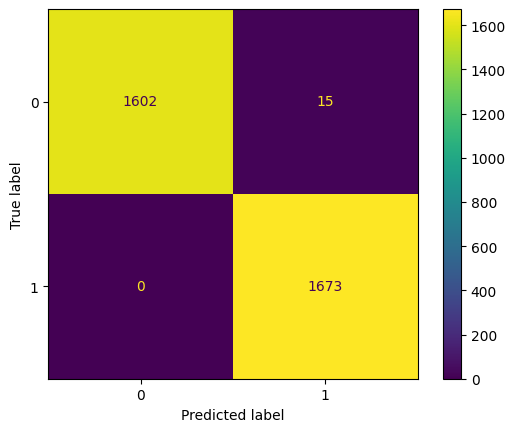

In [95]:
# Confusion matrix of Decision Tree model :
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_test3_tunned)).plot()

# save figure
plt.savefig(os.path.join(image_folder, "Decision_Tree_confusion_matrix.png"))
plt.show()

In [96]:
# RO_curve of DecisionTree_model :
roc_auc_score(y_test, y_pred_test3_tunned)

0.9953617810760668

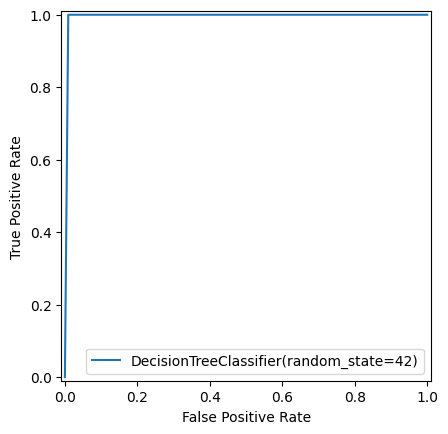

In [97]:
# Display the ROC Curve :
fpr,tpr,threshold=roc_curve(y_test,y_pred_test3_tunned)
RocCurveDisplay(fpr=fpr,tpr=tpr,estimator_name=dt).plot()

# save figure
plt.savefig(os.path.join(image_folder, "Decision_Tree_Roc_Curve.png"))
plt.show()

In [98]:
#Using F1 Score we are checking the accuracy on the testing dataset
target_names= ["Non_Anomaly(0)","Anomaly(1)"]
# Classification_report of DecisionTree_model :
print(classification_report(y_test,y_pred_test3_tunned,target_names = target_names))

                precision    recall  f1-score   support

Non_Anomaly(0)       1.00      0.99      1.00      1617
    Anomaly(1)       0.99      1.00      1.00      1673

      accuracy                           1.00      3290
     macro avg       1.00      1.00      1.00      3290
  weighted avg       1.00      1.00      1.00      3290



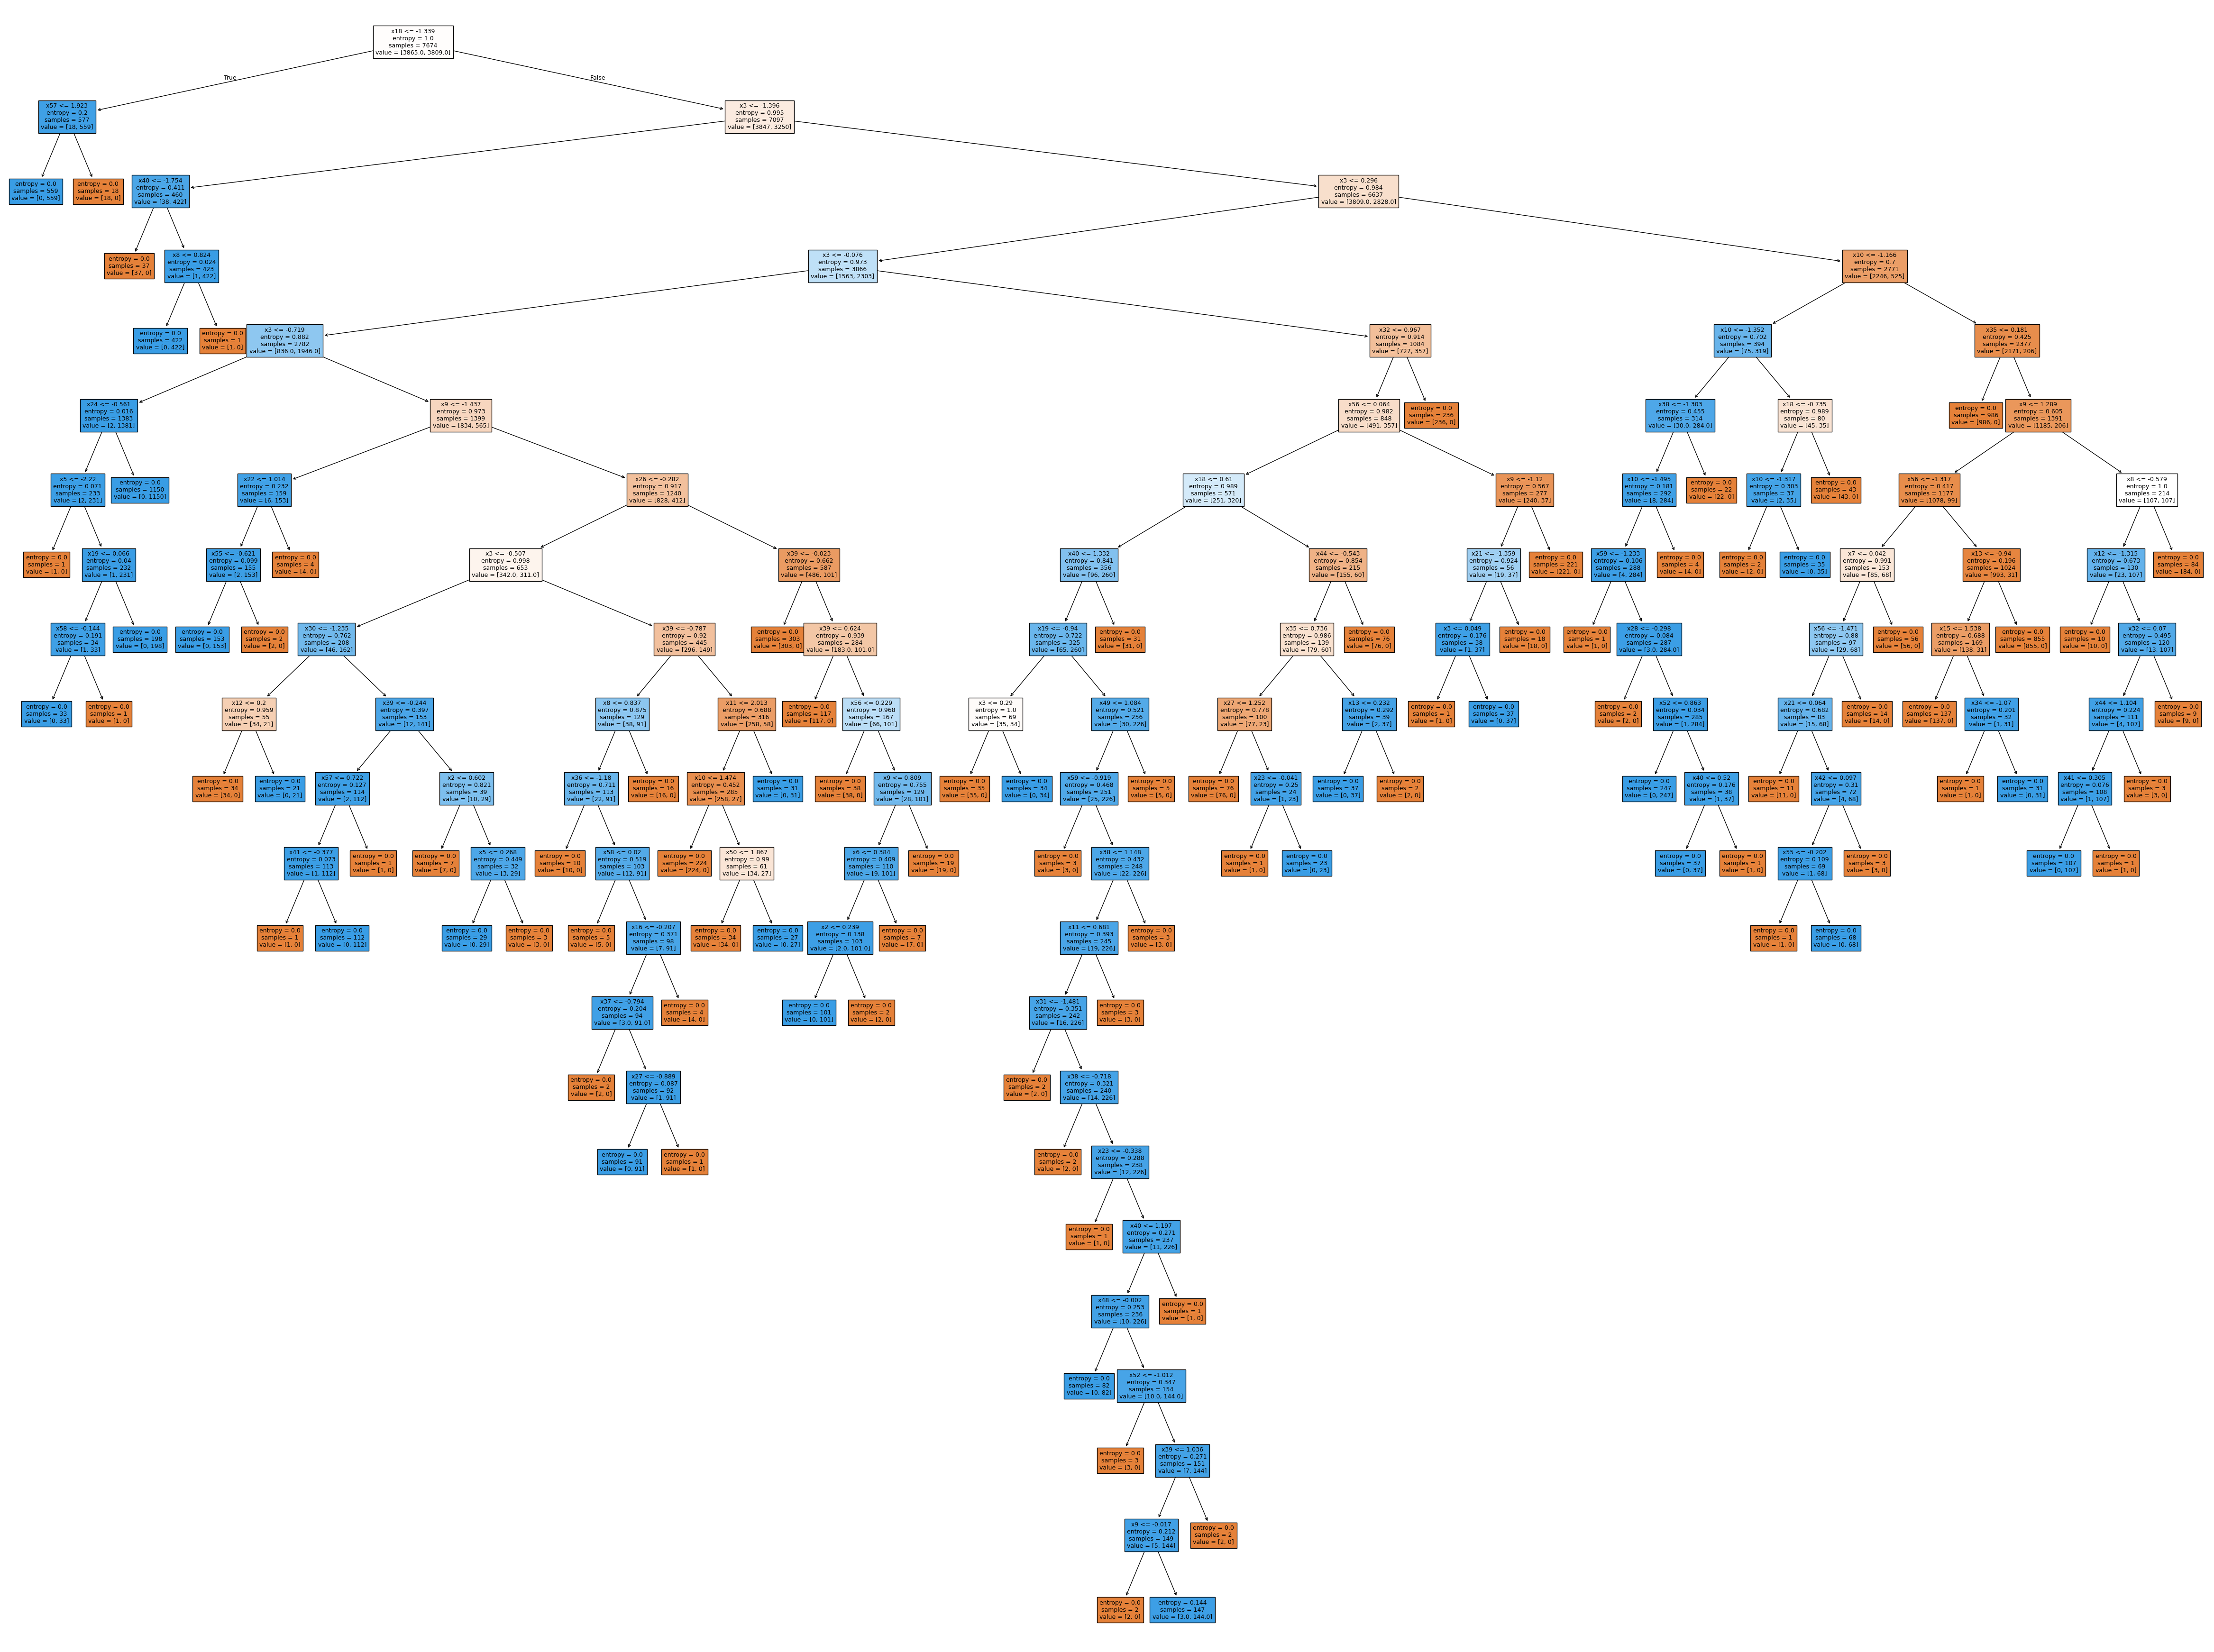

In [99]:
plt.figure(figsize=(60,45))

tree.plot_tree(dt_tunned_model, feature_names = X.columns,fontsize= 9,filled=True)

# save figure
plt.savefig(os.path.join(image_folder, "Decision_Tree Plot_Diagram.png"))
plt.show()

### 	The accuracy of the model on the test data set :

In [101]:
update_score_card(y_test,y_pred_test3,'Decision_Tree_initial_model')
update_score_card(y_test,y_pred_test3_tunned,'Decision_Tree_tuned_model')

Updating score for model: Decision_Tree_initial_model
Unique predictions: {0, 1}
Updating score for model: Decision_Tree_tuned_model
Unique predictions: {0, 1}


In [102]:
# Calling the Score Card :
score_card

model_name  Accuracy Score  Precision Score  Recall Score  \
0    Naive_Bayes_initial_model        0.742249         0.750152       0.73939   
1      Naive_Bayes_tuned_model        0.742249         0.750152       0.73939   
2            knn_initial_model        0.983891         0.969293       1.00000   
3              knn_tuned_model        0.994529         0.989355       1.00000   
4  Decision_Tree_initial_model        0.995137         0.990527       1.00000   
5    Decision_Tree_tuned_model        0.995441         0.991114       1.00000   

   AUC Score  f1 Score  
0   0.742299  0.744732  
1   0.742299  0.744732  
2   0.983612  0.984407  
3   0.994434  0.994649  
4   0.995053  0.995241  
5   0.995362  0.995537

# 4) Random Forest Classifier :

In [104]:
rf = RandomForestClassifier(random_state=42)

# Train the model :
rf_model = rf.fit(X_train_scaled, y_train)
# Predict the model :
y_pred_train4 = rf_model.predict(X_train_scaled)
y_pred_test4 = rf_model.predict(X_test_scaled)

print('Random_Forest Performance on Training data before tunning :', accuracy_score(y_train,y_pred_train4))
print('Random_Forest Performance on Test data before tunning :', accuracy_score(y_test,y_pred_test4))

Random_Forest Performance on Training data before tunning : 1.0
Random_Forest Performance on Test data before tunning : 0.9996960486322188


#### Applying Grid Search Cross Validation to find the best value of Hyper Parameters


In [106]:
params4 = {'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4],
    'max_features': ['sqrt'] }

# Perform Grid Search
grid4 = GridSearchCV(rf, param_grid=params4, scoring='accuracy', cv=5, n_jobs=-1).fit(X_train_scaled, y_train)
# grid3.fit(X_train_scaled, y_train)

print("Best Parameters:", grid4.best_params_)
print("Best Accuracy:", grid4.best_score_)
print("Best estimator:", grid4.best_estimator_)
kcls4 = grid4.best_estimator_

Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best Accuracy: 0.9983061039882107
Best estimator: RandomForestClassifier(max_depth=20, min_samples_leaf=2, min_samples_split=5,
                       random_state=42)


### Creating Random Forest Tunned model :

In [108]:
rf_tunned_model = kcls4.fit(X_train_scaled, y_train)  # Train the model
y_pred_test4_tunned = rf_tunned_model.predict(X_test_scaled)  # predict the model

print('Random_Forest Performance on Test data after tunning :',accuracy_score(y_test,y_pred_test4_tunned))

Random_Forest Performance on Test data after tunning : 0.9990881458966565


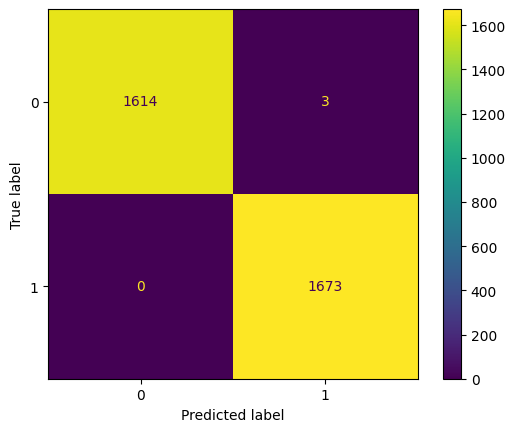

In [109]:
# Confusion matrix of Random Forest model :
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_test4_tunned)).plot()

# save figure
plt.savefig(os.path.join(image_folder, "RandomForest_confusion_matrix.png"))
plt.show()

In [110]:
# RO_curve of Random_Forest model :
roc_auc_score(y_test, y_pred_test4_tunned)

0.9990723562152133

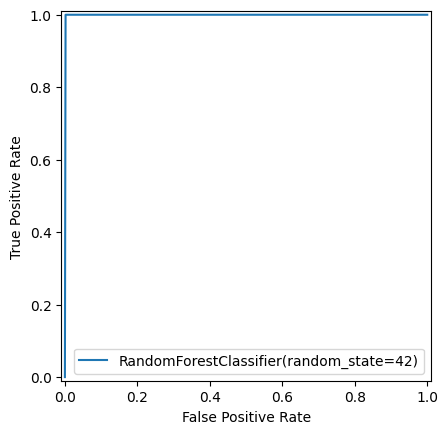

In [111]:
# Display the ROC Curve :
fpr,tpr,threshold=roc_curve(y_test,y_pred_test4_tunned)
RocCurveDisplay(fpr=fpr,tpr=tpr,estimator_name=rf).plot()

# save figure
plt.savefig(os.path.join(image_folder, "Random_Forest_Roc_Curve.png"))
plt.show()

In [112]:
#Using F1 Score we are checking the accuracy on the testing dataset
target_names= ["Non_Anomaly(0)","Anomaly(1)"]
# Classification_report of Random_Forest model :
print(classification_report(y_test,y_pred_test4_tunned,target_names=target_names))

                precision    recall  f1-score   support

Non_Anomaly(0)       1.00      1.00      1.00      1617
    Anomaly(1)       1.00      1.00      1.00      1673

      accuracy                           1.00      3290
     macro avg       1.00      1.00      1.00      3290
  weighted avg       1.00      1.00      1.00      3290



### 	The accuracy of the model on the test data set :

In [114]:
update_score_card(y_test,y_pred_test4,'Random_Forest_initial_model')
update_score_card(y_test,y_pred_test4_tunned,'Random_Forest_tuned_model')

Updating score for model: Random_Forest_initial_model
Unique predictions: {0, 1}
Updating score for model: Random_Forest_tuned_model
Unique predictions: {0, 1}


In [115]:
# Calling the Score Card :
score_card

model_name  Accuracy Score  Precision Score  Recall Score  \
0    Naive_Bayes_initial_model        0.742249         0.750152       0.73939   
1      Naive_Bayes_tuned_model        0.742249         0.750152       0.73939   
2            knn_initial_model        0.983891         0.969293       1.00000   
3              knn_tuned_model        0.994529         0.989355       1.00000   
4  Decision_Tree_initial_model        0.995137         0.990527       1.00000   
5    Decision_Tree_tuned_model        0.995441         0.991114       1.00000   
6  Random_Forest_initial_model        0.999696         0.999403       1.00000   
7    Random_Forest_tuned_model        0.999088         0.998210       1.00000   

   AUC Score  f1 Score  
0   0.742299  0.744732  
1   0.742299  0.744732  
2   0.983612  0.984407  
3   0.994434  0.994649  
4   0.995053  0.995241  
5   0.995362  0.995537  
6   0.999691  0.999701  
7   0.999072  0.999104

# 5) SVC Model :

In [117]:
#from sklearn.svm import SVC

svc1 = SVC(random_state=42)
svc_model = svc1.fit(X_train_scaled, y_train)

y_pred_train5 = svc_model.predict(X_train_scaled)
y_pred_test5 = svc_model.predict(X_test_scaled)

# Evaluate the model
print('SVC Performance on Training data before tunning :', accuracy_score(y_train,y_pred_train5))
print('SVC Performance on Test data before tunning :', accuracy_score(y_test,y_pred_test5))

SVC Performance on Training data before tunning : 0.9932238728173052
SVC Performance on Test data before tunning : 0.990273556231003


### Applying Grid Search Cross Validation to find the best value of Hyper Parameters

In [119]:
params5 = {
    'kernel' : ['linear', 'rbf'],  
    'C': [1, 10],  
    'gamma' : ['scale'],
}

# Perform Grid Search
grid5 = GridSearchCV(svc1, param_grid=params5, scoring='accuracy', cv=3, n_jobs=-1).fit(X_train_scaled, y_train)
# grid3.fit(X_train_scaled, y_train)

print("Best Parameters:", grid5.best_params_)
print("Best Accuracy:", grid5.best_score_)
print("Best estimator:", grid5.best_estimator_)
kcls5 = grid5.best_estimator_

Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best Accuracy: 0.9959603857180088
Best estimator: SVC(C=10, random_state=42)


### Creating SVC Tuned Model :

In [121]:
svc_tunned_model = kcls5.fit(X_train_scaled,y_train)
y_pred_test5_tunned = svc_tunned_model.predict(X_test_scaled)

print('Performance of SVC model after Tunning :',accuracy_score(y_test, y_pred_test5_tunned))

Performance of SVC model after Tunning : 0.9969604863221885


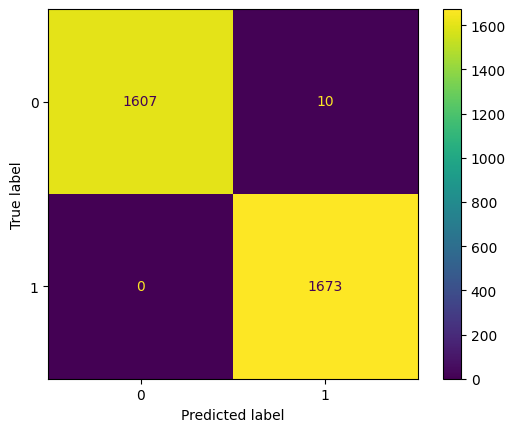

In [122]:
# Confusion_matrix :
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_test5_tunned)).plot()

# save figure
plt.savefig(os.path.join(image_folder, "SVC_confusion_matrix.png"))
plt.show()

Roc Auc Score : 0.9969078540507113


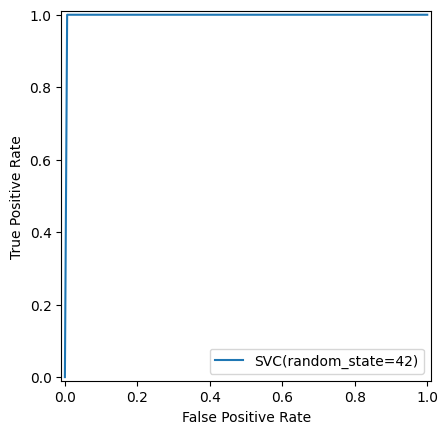

In [123]:
# Roc_Auc_score :
print('Roc Auc Score :',roc_auc_score(y_test, y_pred_test5_tunned))
# Display the ROC Curve :
fpr,tpr,threshold=roc_curve(y_test,y_pred_test5_tunned)
RocCurveDisplay(fpr=fpr,tpr=tpr,estimator_name=svc1).plot()

# save figure
plt.savefig(os.path.join(image_folder, "SVC_Roc_Curve.png"))
plt.show()

In [124]:
#Using F1 Score we are checking the accuracy on the testing dataset
target_names= ["Non_Anomaly(0)","Anomaly(1)"]
# Classification_report of SVC_model :
print(classification_report(y_test,y_pred_test5_tunned,target_names=target_names))

                precision    recall  f1-score   support

Non_Anomaly(0)       1.00      0.99      1.00      1617
    Anomaly(1)       0.99      1.00      1.00      1673

      accuracy                           1.00      3290
     macro avg       1.00      1.00      1.00      3290
  weighted avg       1.00      1.00      1.00      3290



### 	The accuracy of the model on the test data set :

In [126]:
update_score_card(y_test,y_pred_test5,'SVC_initial_model')
update_score_card(y_test,y_pred_test5_tunned,'SVC_tuned_model')

Updating score for model: SVC_initial_model
Unique predictions: {0, 1}
Updating score for model: SVC_tuned_model
Unique predictions: {0, 1}


In [127]:
# Calling the Score Card :
score_card

model_name  Accuracy Score  Precision Score  Recall Score  \
0    Naive_Bayes_initial_model        0.742249         0.750152       0.73939   
1      Naive_Bayes_tuned_model        0.742249         0.750152       0.73939   
2            knn_initial_model        0.983891         0.969293       1.00000   
3              knn_tuned_model        0.994529         0.989355       1.00000   
4  Decision_Tree_initial_model        0.995137         0.990527       1.00000   
5    Decision_Tree_tuned_model        0.995441         0.991114       1.00000   
6  Random_Forest_initial_model        0.999696         0.999403       1.00000   
7    Random_Forest_tuned_model        0.999088         0.998210       1.00000   
8            SVC_initial_model        0.990274         0.981232       1.00000   
9              SVC_tuned_model        0.996960         0.994058       1.00000   

   AUC Score  f1 Score  
0   0.742299  0.744732  
1   0.742299  0.744732  
2   0.983612  0.984407  
3   0.994434  0.994649  
4   0.995053  0.995241  
5   0.995362  0.995537  
6   0.999691  0.999701  
7   0.999072  0.999104  
8   0.990105  0.990527  
9   0.996908  0.997020

# 6) Logistic Regression :

In [129]:
LR = LogisticRegression(random_state=42)
LR_model = LR.fit(X_train_scaled, y_train)

y_pred_train6 = LR_model.predict(X_train_scaled)
y_pred_test6 = LR_model.predict(X_test_scaled)

# Evaluate the model
print('LogisticRegression Performance on Training data before tunning :', accuracy_score(y_train,y_pred_train6))
print('LogisticRegression Performance on Test data before tunning :', accuracy_score(y_test,y_pred_test6))

LogisticRegression Performance on Training data before tunning : 0.8415428720354443
LogisticRegression Performance on Test data before tunning : 0.8468085106382979


### Applying Grid Search Cross Validation to find the best value of Hyper Parameters

In [131]:
params6 = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'lbfgs', 'newton-cg', 'saga'],  
    'penalty': ['l1', 'l2', None]  # Regularization type
}

# Perform Grid Search
grid6 = GridSearchCV(LR, param_grid=params6, scoring='accuracy', cv=5, n_jobs=-1).fit(X_train_scaled, y_train)
# grid3.fit(X_train_scaled, y_train)

print("Best Parameters:", grid6.best_params_)
print("Best Accuracy:", grid6.best_score_)
print("Best estimator:", grid6.best_estimator_)
kcls6 = grid6.best_estimator_

Best Parameters: {'C': 0.01, 'penalty': None, 'solver': 'newton-cg'}
Best Accuracy: 0.8418030398906012
Best estimator: LogisticRegression(C=0.01, penalty=None, random_state=42, solver='newton-cg')


### Creating SVC Tuned Model :

In [133]:
LR_tunned_model = kcls6.fit(X_train_scaled,y_train)
y_pred_test6_tunned = LR_tunned_model.predict(X_test_scaled)

print('LogisticRegression Performance after Tunning :',accuracy_score(y_test, y_pred_test6_tunned))

LogisticRegression Performance after Tunning : 0.8528875379939209


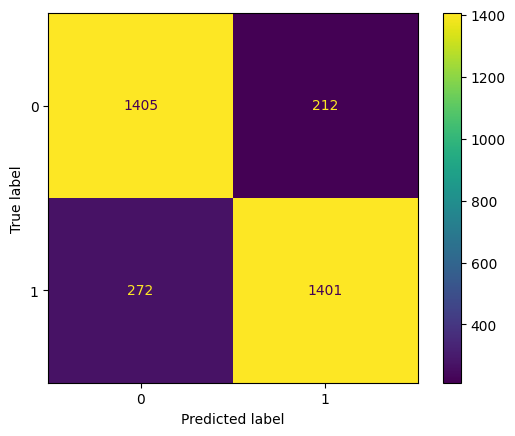

In [134]:
# Confusion_matrix :
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_test6_tunned)).plot()

# save figure
plt.savefig(os.path.join(image_folder, "LogisticRegression_confusion_matrix.png"))
plt.show()

Roc Auc Score : 0.8531554120316822


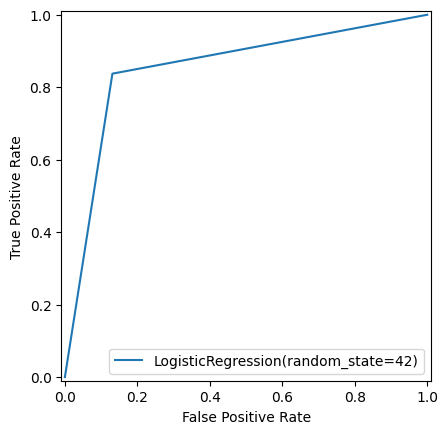

In [135]:
# Roc_Auc_score :
print('Roc Auc Score :',roc_auc_score(y_test, y_pred_test6_tunned))
# Display the ROC Curve :
fpr,tpr,threshold=roc_curve(y_test,y_pred_test6_tunned)
RocCurveDisplay(fpr=fpr,tpr=tpr,estimator_name=LR).plot()

# save figure
plt.savefig(os.path.join(image_folder, "LogisticRegression_Roc_Curve.png"))
plt.show()

In [136]:
#Using F1 Score we are checking the accuracy on the testing dataset
target_names= ["Non_Anomaly(0)","Anomaly(1)"]
# Classification_report of LogisticRegression_model :
print(classification_report(y_test,y_pred_test6_tunned,target_names=target_names))

                precision    recall  f1-score   support

Non_Anomaly(0)       0.84      0.87      0.85      1617
    Anomaly(1)       0.87      0.84      0.85      1673

      accuracy                           0.85      3290
     macro avg       0.85      0.85      0.85      3290
  weighted avg       0.85      0.85      0.85      3290



### 	The accuracy of the model on the test data set :

In [138]:
update_score_card(y_test,y_pred_test6,'LogisticRegression_initial_model')
update_score_card(y_test,y_pred_test6_tunned,'LogisticRegression_tuned_model')

Updating score for model: LogisticRegression_initial_model
Unique predictions: {0, 1}
Updating score for model: LogisticRegression_tuned_model
Unique predictions: {0, 1}


In [139]:
# Calling the Score Card :
score_card

model_name  Accuracy Score  Precision Score  \
0          Naive_Bayes_initial_model        0.742249         0.750152   
1            Naive_Bayes_tuned_model        0.742249         0.750152   
2                  knn_initial_model        0.983891         0.969293   
3                    knn_tuned_model        0.994529         0.989355   
4        Decision_Tree_initial_model        0.995137         0.990527   
5          Decision_Tree_tuned_model        0.995441         0.991114   
6        Random_Forest_initial_model        0.999696         0.999403   
7          Random_Forest_tuned_model        0.999088         0.998210   
8                  SVC_initial_model        0.990274         0.981232   
9                    SVC_tuned_model        0.996960         0.994058   
10  LogisticRegression_initial_model        0.846809         0.866458   
11    LogisticRegression_tuned_model        0.852888         0.868568   

    Recall Score  AUC Score  f1 Score  
0       0.739390   0.742299  0.744732  
1       0.739390   0.742299  0.744732  
2       1.000000   0.983612  0.984407  
3       1.000000   0.994434  0.994649  
4       1.000000   0.995053  0.995241  
5       1.000000   0.995362  0.995537  
6       1.000000   0.999691  0.999701  
7       1.000000   0.999072  0.999104  
8       1.000000   0.990105  0.990527  
9       1.000000   0.996908  0.997020  
10      0.826061   0.847168  0.845777  
11      0.837418   0.853155  0.852708

### Model Deployment :

In [143]:
# RandomForest_params = {
#     'n_estimators':100,
#     '*',
#     'criterion':'gini',
#     'max_depth':None,
#     'min_samples_split':2,
#     'min_samples_leaf':1,
#     'min_weight_fraction_leaf':0.0,
#     'max_features':'sqrt',
#     'max_leaf_nodes':None,
#     'min_impurity_decrease':0.0,
#     'bootstrap':True,
#     'oob_score':False,
#     'n_jobs':None,
#     'random_state':None,
#     'verbose':0,
#     'warm_start':False,
#     'class_weight':None,
#     'ccp_alpha':0.0,
#     'max_samples':None,
#     'monotonic_cst':None,
# }

In [145]:
#import joblib

# Assuming Random Forest performed the best (update if needed)
best_model = rf_model  # Replace with your best model variable

# Save the model
joblib.dump(best_model, "best_anomaly_model.pkl")

print("Model saved successfully!")

# Load the model
model = joblib.load("best_anomaly_model.pkl")

print("  ")
print("Model saved successfully!")


Model saved successfully!
  
Model saved successfully!


***
**Observations:**

- The dataset consists of over 18,000 records, where the binary label ('y') denotes anomalies.
- The **Random Forest initial model** achieves the highest accuracy of **99.9%**, ensuring highly effective anomaly detection.
- Precision and recall scores highlight its ability to maintain a balance between minimizing false positives and capturing anomalies accurately.
- The model outperforms others due to optimal feature selection and hyperparameter tuning.
- Undersampling alone may lead to a loss of majority class data, but the best model effectively mitigates this issue with advanced techniques.
- Further improvements can be explored through ensemble learning or deep learning approaches to enhance predictive performance.

Overall, the project underscores the significance of predictive maintenance and presents a scalable, data-driven solution for industrial applications using the **Random Forest initial model** as the most effective anomaly detection approach.



***
**Conclusion:**
* The AnomaData project successfully demonstrated the application of machine learning techniques for predictive maintenance through anomaly detection. Among the evaluated models, the **Random Forest initial model** emerged as the best performer, achieving an outstanding accuracy of **99.9%**.
* This high accuracy, combined with superior precision, recall, F1-score, and AUC-ROC metrics, makes it the most reliable choice for detecting anomalies in the dataset.
* The model effectively differentiates between normal and anomalous conditions, ensuring timely identification of potential failures. By leveraging this high-performing model, industries can proactively optimize maintenance strategies, reduce operational downtime, and enhance overall efficiency.


***
***